In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\Admin'

In [3]:
pwd

'C:\\Users\\Admin'

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 64AF-5BDA

 Directory of C:\Users\Admin

05/19/2022  10:52 AM    <DIR>          .
05/19/2022  10:52 AM    <DIR>          ..
05/16/2022  01:19 PM    <DIR>          .ipynb_checkpoints
10/26/2021  08:22 PM    <DIR>          .ipython
10/26/2021  08:24 PM    <DIR>          .jupyter
10/26/2021  08:22 PM    <DIR>          .matplotlib
10/27/2021  06:12 AM                41 .python_history
12/27/2021  01:12 PM               218 .recently-used.xbel
10/26/2021  09:01 PM    <DIR>          .spyder-py3
09/14/2021  11:59 AM    <DIR>          .vscode
02/01/2022  12:29 PM    <DIR>          __pycache__
04/07/2022  07:41 PM           435,056 00-KNN-Classification-Copy1.ipynb
03/29/2022  04:35 PM           302,691 01-Linear-Regression-with-Scitkit-Learn-Copy1.ipynb
03/29/2022  04:35 PM            18,149 03-Regularization-Ridge-Lasso-ElasticNet.ipynb
02/08/2022  09:07 AM           240,990 03-Useful-Methods.ipynb
04/18/2022  06:16 PM             2,42

!(bank loan2.jpg)(att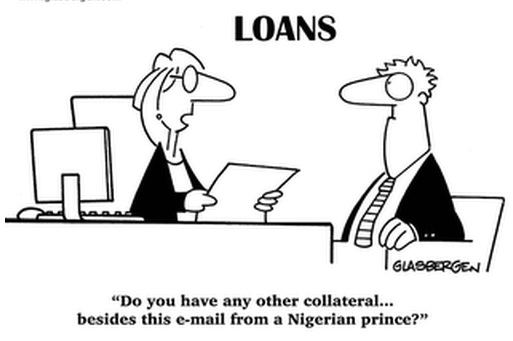achment:bank loan2.jpg)

PROBLEM STATEMENT:
The bank wants to automate the loan eligibility process based on available customer details. These details are Gender,Marital Status,Number of Dependents,Education,Job type,Income,Loan Amount(In thousands),Tenure(in months)(Period from the date of disbursement of loan to the date of the last EMI payment or the date of closure of loan),Credit History and others.

They have provided a dataset to identify the potential customer that are eligible for loan amounts so that they can specifically target these customers.

In [5]:
#loading training dataset to pandas df
dataset=pd.read_csv("train.csv")

In [6]:
df=dataset.copy()

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
#Rows, columns of df
print('Rows, columns of dataframe : ',df.shape)

Rows, columns of dataframe :  (614, 13)


In [10]:
print('Size : ',df.size)

Size :  7982


In [11]:
print('Features : ',df.columns)

Features :  Index(['Loan_ID', 'Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Income', 'Coapplicant_Income', 'Loan_Amount',
       'Tenure', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Sex                 601 non-null    object 
 2   Marital_Status      611 non-null    object 
 3   No_Dependents       599 non-null    object 
 4   Education_Status    614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Income              614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Tenure              600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


1.614 entries(0 to 613)

2.13 Features (0 to 12)

3.3 datatypes :float64(4), int64(1), object(8)

4.memory usage: 62.5+ KB

5.There are null values needs to be treated

In [13]:
df.describe()

,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Variables information

In [14]:
df.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
print("Categorical variables\n","~"*50,"\n")
Cat_var=['Sex','Marital_Status','No_Dependents','Education_Status','Self_Employed','Credit_History','Property_Area','Tenure','Loan_Status']
for i in Cat_var:
    print(f'{i}\n\n{df[i].value_counts()}\n','*'*50)

Categorical variables
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

Sex

Male      489
Female    112
Name: Sex, dtype: int64
 **************************************************
Marital_Status

Yes    398
No     213
Name: Marital_Status, dtype: int64
 **************************************************
No_Dependents

0     345
1     102
2     101
3+     51
Name: No_Dependents, dtype: int64
 **************************************************
Education_Status

Graduate        480
Not Graduate    134
Name: Education_Status, dtype: int64
 **************************************************
Self_Employed

No     500
Yes     82
Name: Self_Employed, dtype: int64
 **************************************************
Credit_History

1.0    475
0.0     89
Name: Credit_History, dtype: int64
 **************************************************
Property_Area

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
 **************************************************
Te

Categorical variables(9):Gender (Male/Female),Married(Yes/No),Number of dependents (Possible values:0,1,2,3+)(Ordinal),Education (Graduate / Not Graduate),Self-Employed(Yes/No),credit history(Yes/No),Property Area (Rural/Semi-Urban/Urban)(Ordinal),Loan Status(Yes/No)(i.e.Target variable),Tenure.

Continuous/Numerical variables(4):Loan ID,Applicant Income,Co-applicant Income,Loan Amount.

# Data Preprocessing

In [16]:
#Dropping unwanted Loan ID column
#Its a unique id for each cutomer and have no predictive power. It can be dropped as it will not show any significance to result and can mislead the model.
df.drop('Loan_ID',axis=1,inplace=True)

In [17]:
#Gender is common term regarded with general masses while sex is biological term.
df.rename({'Sex':'Gender'},axis=1,inplace=True)

In [18]:
df.head()

,Gender,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#Treating missing values

In [19]:
#Identifying missing values
df.isnull().sum()

Gender                13
Marital_Status         3
No_Dependents         15
Education_Status       0
Self_Employed         32
Income                 0
Coapplicant_Income     0
Loan_Amount           22
Tenure                14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

<AxesSubplot:>

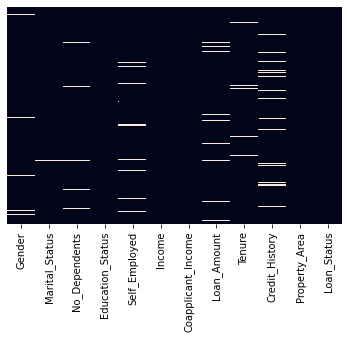

In [20]:
#Identifying missing values with visualisation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [21]:
#Filling the missing data with the mode value for a categorical variable.
df['Gender'].fillna(df.Gender.mode()[0],inplace=True)
df['Marital_Status'].fillna(df.Marital_Status.mode()[0],inplace=True)
df['No_Dependents'].fillna(df.No_Dependents.mode()[0],inplace=True)
df['Self_Employed'].fillna(df.Self_Employed.mode()[0],inplace=True)
df['Credit_History'].fillna(df.Credit_History.mode()[0],inplace=True)
df['Tenure'].fillna(df['Tenure'].mode()[0],inplace=True)

The median is used to fill the null values as loan amount has outliers(detected in next step) so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [22]:
#Filling the missing data with the mean value for a numerical variable.
df['Loan_Amount'].fillna(df['Loan_Amount'].median(),inplace=True)


<AxesSubplot:>

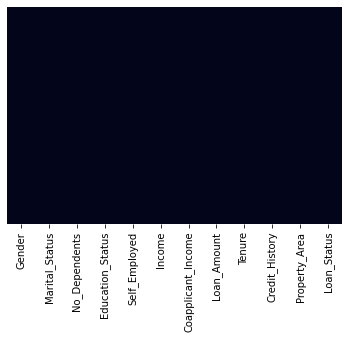

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)#null values fixed

In [24]:
df['Credit_History']=df['Credit_History'].astype(int)
df['Loan_Amount']=df['Loan_Amount'].astype(int)
df['Tenure']=df['Tenure'].astype(int)

# Detecting Outliers

In [25]:
#shows distribution is skewed
col=['Income','Coapplicant_Income','Loan_Amount']
for i in col:
    print(df[i].skew())

6.539513113994625
7.491531216657306
2.743052748820892


In [26]:
#outlier detection with describe method
'''  INCOME
Mean=5403 Median=3812
Min=150 Max=81000
25% of population have income below 2877
50% of population have income below 3812
75% of population have income below 5795

     Coapplicant_Income
Mean=1621 Median=1188
Min=0 Max=41667
25% of population have income below 0
50% of population have income below 1188
75% of population have income below 2297

     Loan_Amount
Mean=146 Median=129
Min=9 Max=700
25% of population have income below 100
50% of population have income below 129
75% of population have income below 164
'''


df[['Income','Coapplicant_Income','Loan_Amount']].describe()

,Income,Coapplicant_Income,Loan_Amount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443
std,6109.041673,2926.248369,84.107233
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


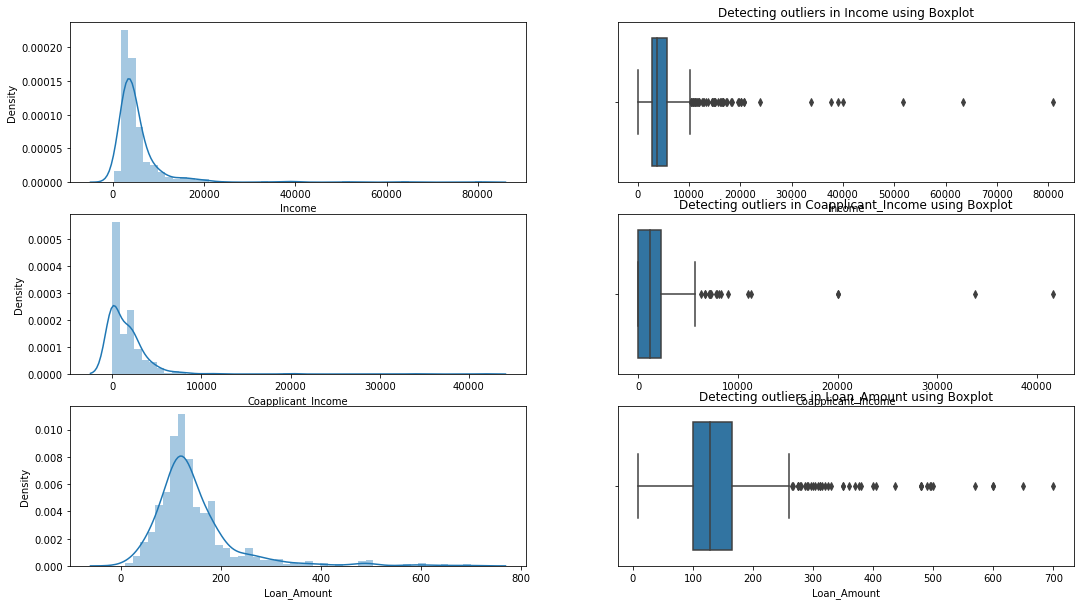

In [27]:
plt.figure(figsize=(18,10))

plt.subplot(3,2,1)
sns.distplot(df['Income'])
plt.subplot(3,2,2)
sns.boxplot(df['Income'])
plt.title("Detecting outliers in Income using Boxplot")

plt.subplot(3,2,3)
sns.distplot(df['Coapplicant_Income'])
plt.subplot(3,2,4)
sns.boxplot(df['Coapplicant_Income'])
plt.title("Detecting outliers in Coapplicant_Income using Boxplot")


plt.subplot(3,2,5)
sns.distplot(df['Loan_Amount'])
plt.subplot(3,2,6)
sns.boxplot(df['Loan_Amount'])
plt.title("Detecting outliers in Loan_Amount using Boxplot")



plt.show()




#Observations

(1)Distribution of applicant income is right skewed and it has lots of outliers.This can be due to the high income differences in the society.

(2)Similar distribution with coapplicant income

(3)loan amount distribution is fairly normal and still has lot of outliers but outliers in loan amount is possible because loan amount can vary depending upon requirement of applicant. as there can be different reasons why high amount loans were approved we will not treat outliers here

In [28]:
#replacing with 90th percentile

In [29]:
def max_value(data,variable):
    value=np.percentile(data[variable], 90)
    return value

In [30]:
income_max=max_value(df,'Income')
co_income_max=max_value(df,'Coapplicant_Income')
print(income_max)
print(co_income_max)

9459.900000000007
3782.200000000002


In [31]:
def outlier_treatment1(Income):
    if Income>income_max:
        return income_max
    else:
        return Income

In [32]:
def outlier_treatment2(Coapplicant_Income):
    if Coapplicant_Income>co_income_max:
        return co_income_max
    else:
        return Coapplicant_Income

In [33]:
df['Income']=df['Income'].apply(outlier_treatment1)
df['Coapplicant_Income']=df['Coapplicant_Income'].apply(outlier_treatment2)

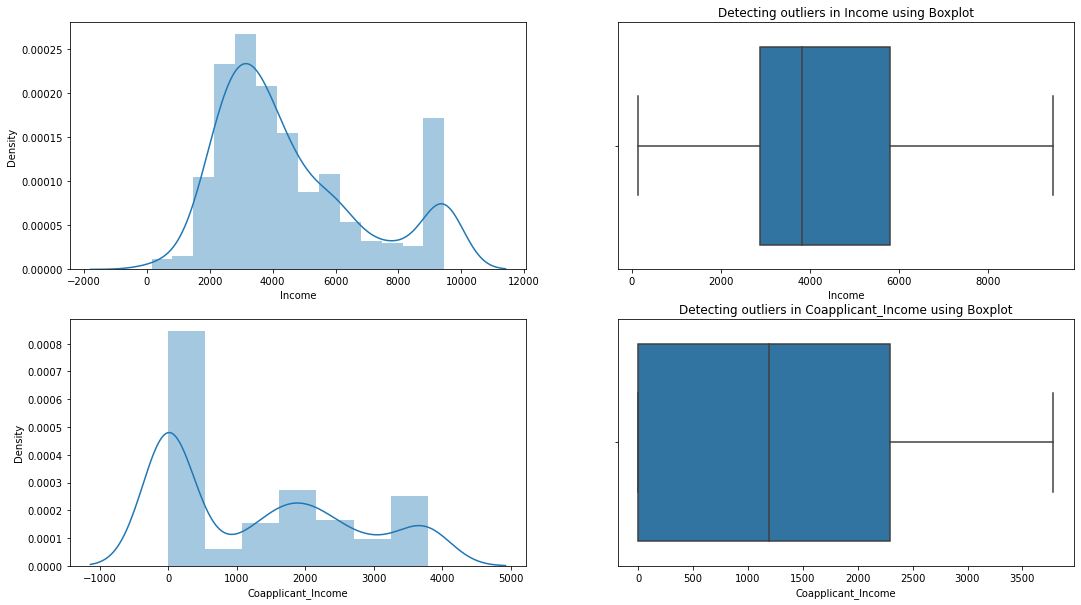

In [34]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.distplot(df['Income'])
plt.subplot(2,2,2)
sns.boxplot(df['Income'])
plt.title("Detecting outliers in Income using Boxplot")

plt.subplot(2,2,3)
sns.distplot(df['Coapplicant_Income'])
plt.subplot(2,2,4)
sns.boxplot(df['Coapplicant_Income'])
plt.title("Detecting outliers in Coapplicant_Income using Boxplot")

plt.show()

# Exploratory Data Analysis

Univariate Analysis

In [35]:
#loan status is target variable its important to know its co relation with other variables hence
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

<AxesSubplot:>

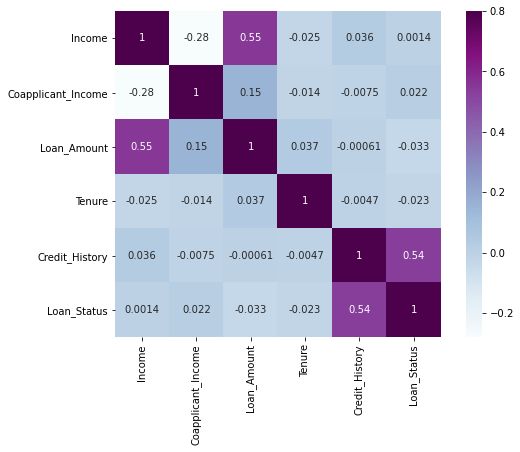

In [36]:
# The variables with darker color means their correlation is more.
matrix = df.corr()
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

The most correlated variables are (Income - Loan_Amount) and (Credit_History - Loan_Status).

(Loan_Amount is also correlated with Coapplicant_Income).

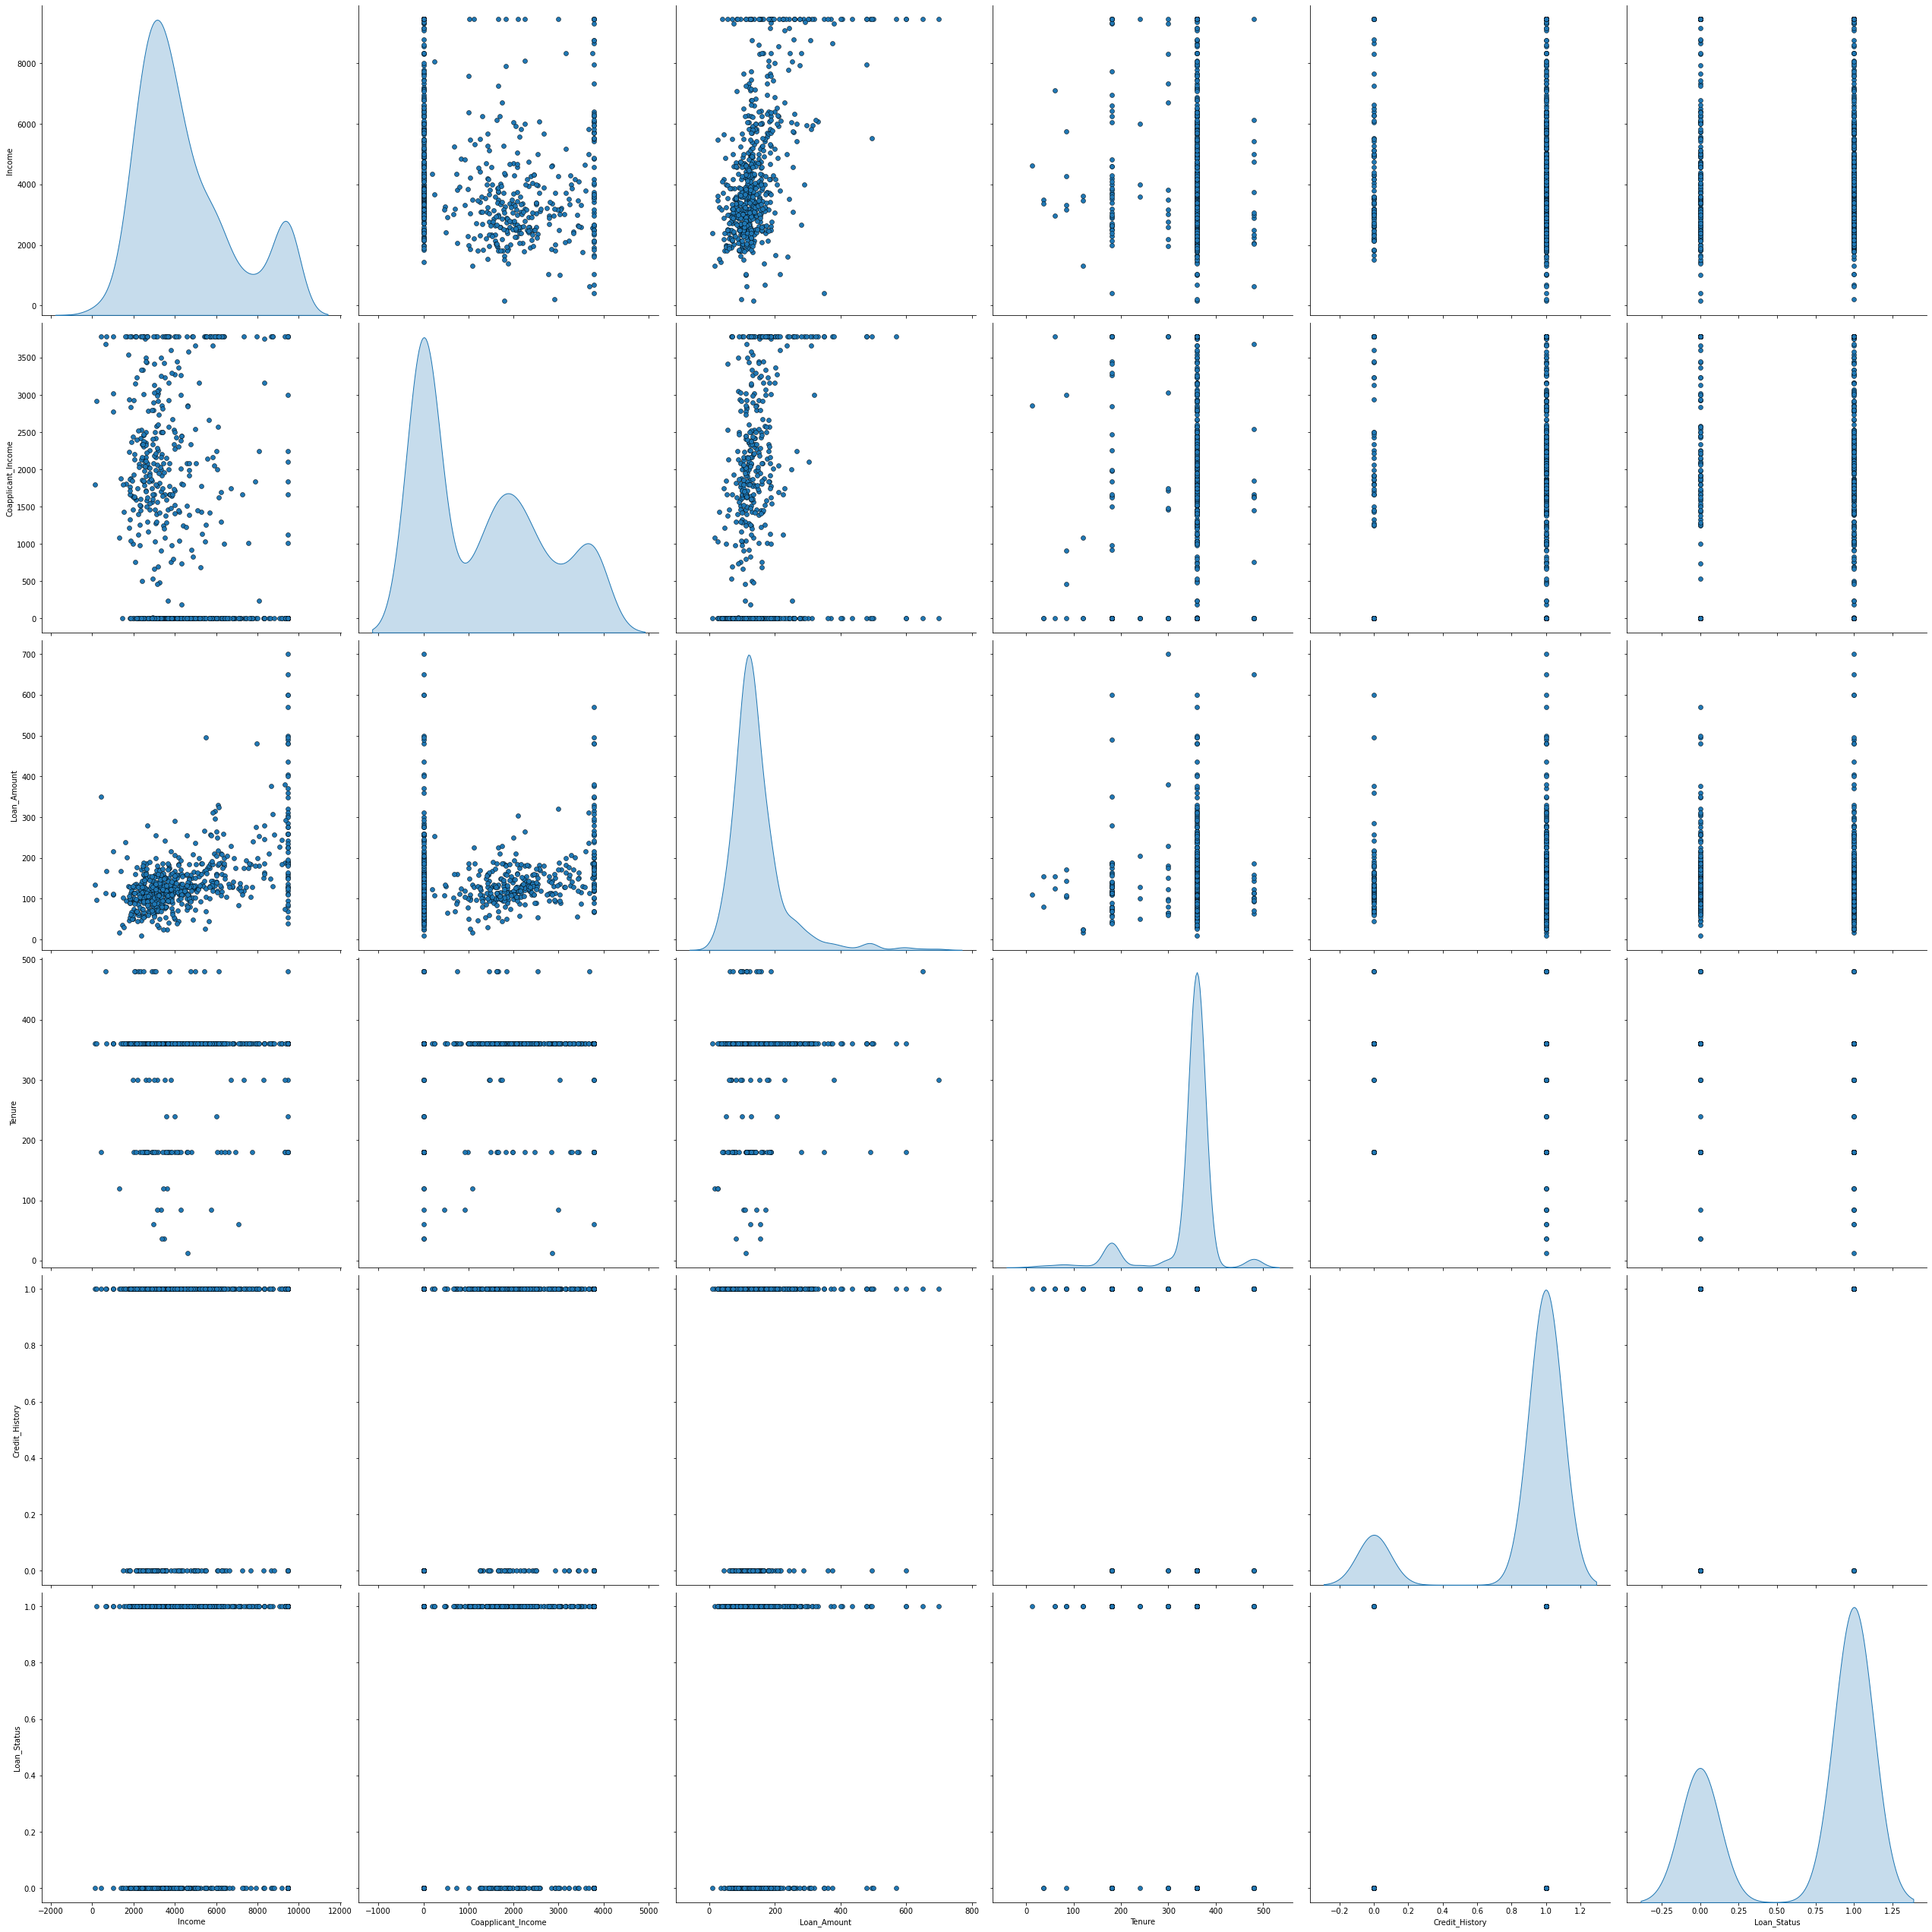

In [37]:
sns.pairplot(df,diag_kind = 'kde',plot_kws = {'edgecolor': 'k'}, height = 6)
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

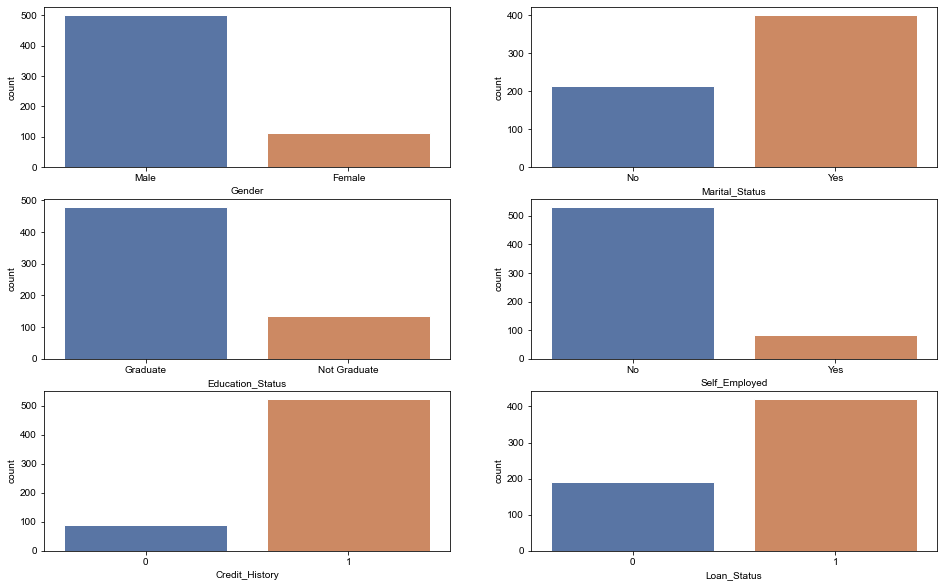

In [38]:
fig,ax=plt.subplots(3,2,figsize=(16,10))
sns.set(style="whitegrid")
sns.countplot(x ='Gender', data = df,ax=ax[0][0])
sns.countplot(x ='Marital_Status', data = df,ax=ax[0][1])
sns.countplot(x ='Education_Status', data = df,ax=ax[1][0])
sns.countplot(x ='Self_Employed', data = df,ax=ax[1][1])
sns.countplot(x ='Credit_History', data = df,ax=ax[2][0])
sns.countplot(x ='Loan_Status', data = df,ax=ax[2][1])

#Observations

1.out of total applicants 82% are male and 18% are female i.e. Male applicants are more than Female

2.out of total applicants 65% are married and 35% are unmarried i.e. Married applicant are more than Non-married

3.out of total applicants 78% are Graduates and 22% are not graduate i.e.graduate applicant are more than not graduate

4.out of total applicants 87% are Not self employed and 13% are self employed i.e.self-employed applicant are less than that of Non-Self-employed

5.out of total applicants 86% have credit history and 14% do not have credit history i.e.many applicants have Credit History

6.out of total applicants 69% loans are approved and 31% loans are not approved i.e.more loans are approved than Rejected

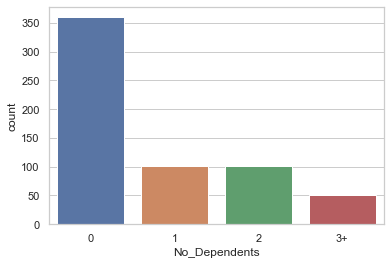

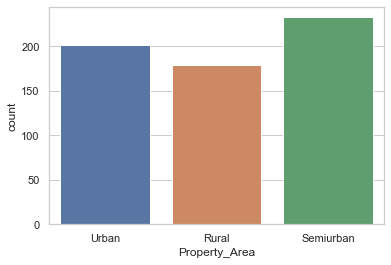

In [39]:
nom_cat_var=['No_Dependents','Property_Area']
for i in nom_cat_var:
    sns.set(style="whitegrid")
    sns.countplot(x =i, data = df)
    plt.show()

#Observations

1.The count of applicants with zero dependents is maximum.

2.The count of applicants belonging to suburban areas is highest, followed by people from urban areas, while Rural areas have the lowest percentage of people applying for loans.


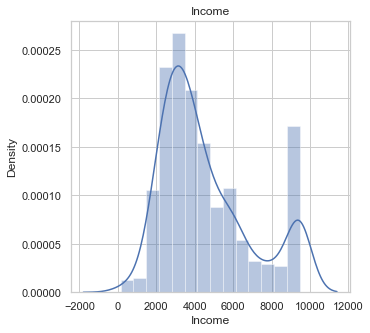

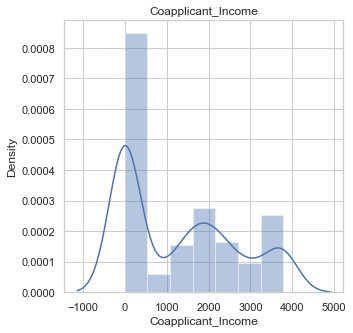

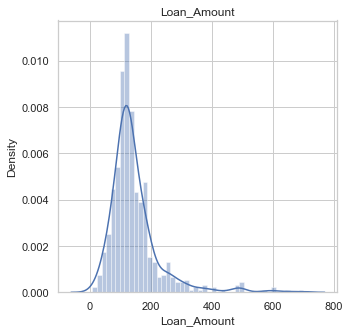

In [40]:
cont_var=['Income','Coapplicant_Income','Loan_Amount']
for i in cont_var:
    plt.figure(figsize=(5,5))
    sns.set(style="whitegrid")
    sns.distplot(df[i])
    plt.title(i)
    plt.show()
    


#Bivariate Analysis

<AxesSubplot:xlabel='Property_Area'>

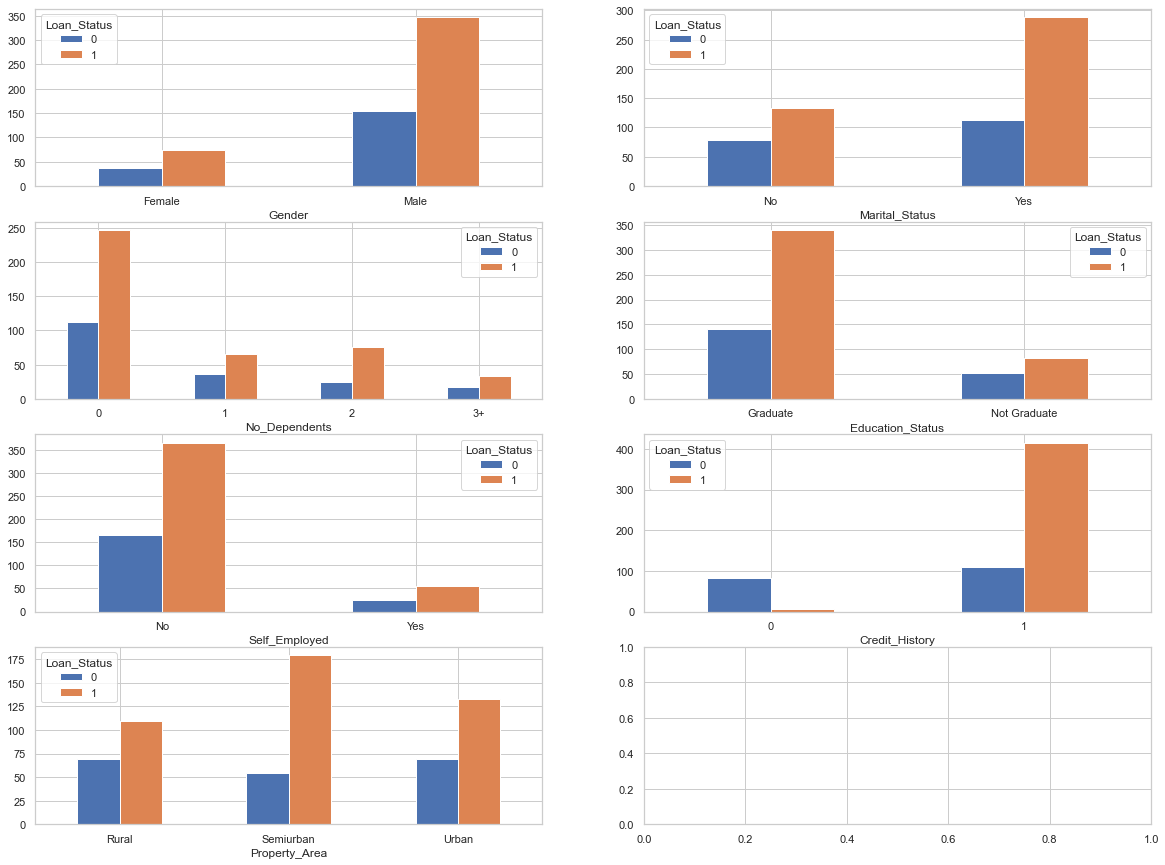

In [41]:
fig,ax=plt.subplots(4,2,figsize=(20,15))

cross_tab=pd.crosstab(df['Gender'],df['Loan_Status'])
cross_tab.plot.bar(rot=0,ax=ax[0][0])

cross_tab=pd.crosstab(df['Marital_Status'],df['Loan_Status'])
cross_tab.plot.bar(rot=0,ax=ax[0][1])

cross_tab=pd.crosstab(df['No_Dependents'],df['Loan_Status'])
cross_tab.plot.bar(rot=0,ax=ax[1][0])

cross_tab=pd.crosstab(df['Education_Status'],df['Loan_Status'])
cross_tab.plot.bar(rot=0,ax=ax[1][1])

cross_tab=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
cross_tab.plot.bar(rot=0,ax=ax[2][0])

cross_tab=pd.crosstab(df['Credit_History'],df['Loan_Status'])
cross_tab.plot.bar(rot=0,ax=ax[2][1])

cross_tab=pd.crosstab(df['Property_Area'],df['Loan_Status'])
cross_tab.plot.bar(rot=0,ax=ax[3][0])



#Obseravtions:

(1)82% of the applicants whose loans were approved are male

(df[(df['Loan_Status']==1)& (df['Gender']==0)].shape=347)

(df[df['Loan_Status']==1].shape=422)

(df[df['Gender']==0].shape=502)



(2)68% of the applicants whose loans were approved are married applicants.

(df[(df['Loan_Status']==1)& (df['Marital_Status']==1)].shape=288)

(df[df['Loan_Status']==1].shape=422)

(df[df['Marital_Status']==1].shape=401)



(3)58% of the applicants whose loans were approved don't have any dependant member.

(df[(df['Loan_Status']==1)& (df['No_Dependents']==0)].shape=247)

(df[df['Loan_Status']==1].shape=422)

(df[df['No_Dependents']==0].shape=360)



(4)80% of the applicants whose loans were approved are graduate.

(df[(df['Loan_Status']==1)& (df['Education_Status']==1)].shape=340)

(df[df['Loan_Status']==1].shape=422)

(df[df['Education_Status']==1].shape=480)



(5)86% of the applicants whose loans were approved are not self emplyoed.

(df[(df['Loan_Status']==1)& (df['Self_Employed']==0)].shape=366)

(df[df['Loan_Status']==1].shape=422)

(df[df['Self_Employed']==0].shape=532)



(6)98% of the applicants whose loans were approved have Credit_History (equals to 1).

people with a credit history as 1 are more likely to get their loans approved.

(df[(df['Loan_Status']==1)& (df['Credit_History']==1)].shape=415)

(df[df['Loan_Status']==1].shape=422)

(df[df['Credit_History']==1].shape=525)



(7)most of the applicants whose loans were approved are from semiurban area.

(df[(df['Loan_Status']==1)& (df['Property_Area']==2)].shape=179)

(df[df['Loan_Status']==1].shape=422)

(df[df['Property_Area']==2].shape=233)


Text(0, 0.5, 'Percentage')

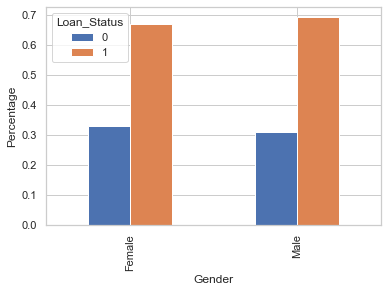

In [42]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar", stacked=False)
plt.xlabel('Gender')
plt.ylabel('Percentage')


(1)almost same percentage of male and female applicants have approved or disapproved loan. Gender is not significant deciding factor for loan status.

Text(0, 0.5, 'Percentage')

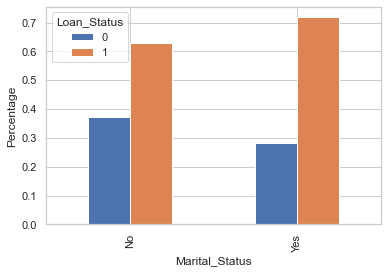

In [43]:

Marital_Status=pd.crosstab(df['Marital_Status'],df['Loan_Status'])
Marital_Status.div(Marital_Status.sum(1).astype(float),axis=0).plot(kind="bar", stacked=False)
plt.xlabel('Marital_Status')
plt.ylabel('Percentage')

(2)percentage of married applicant is more or less equal to unmarried applicants for approved loan.Married status is not significant deciding factor for loan status.

Text(0, 0.5, 'Percentage')

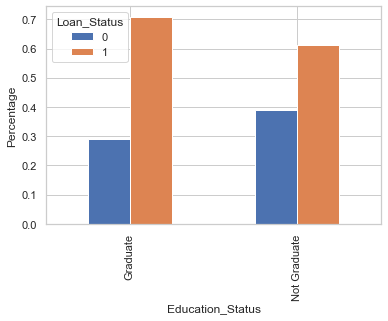

In [44]:
Education_Status=pd.crosstab(df['Education_Status'],df['Loan_Status'])
Education_Status.div(Education_Status.sum(1).astype(float),axis=0).plot(kind="bar", stacked=False)
plt.xlabel('Education_Status')
plt.ylabel('Percentage')


(3)percentage of graduate applicant is higher than non-graduate applicants for approved loan.


Text(0, 0.5, 'Percentage')

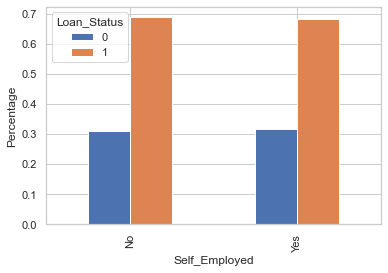

In [45]:
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar", stacked=False)
plt.xlabel('Self_Employed')
plt.ylabel('Percentage')


(4)almost same percentage of self employed and non-self employed applicants have approved or disapproved loan. self employment is not significant deciding factor for loan status.


Text(0, 0.5, 'Percentage')

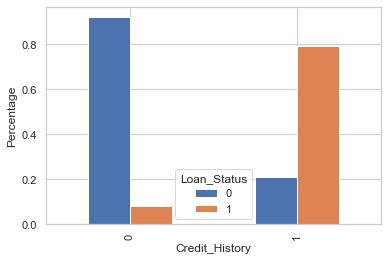

In [46]:
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar", stacked=False)
plt.xlabel('Credit_History')
plt.ylabel('Percentage')


(5)people with a credit history as 1 are more likely to get their loans approved.


Text(0, 0.5, 'Percentage')

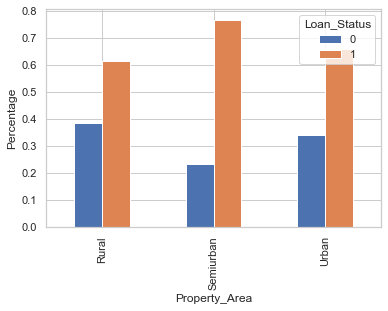

In [47]:
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar", stacked=False)
plt.xlabel('Property_Area')
plt.ylabel('Percentage')




(6)The percentage of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.


<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount'>

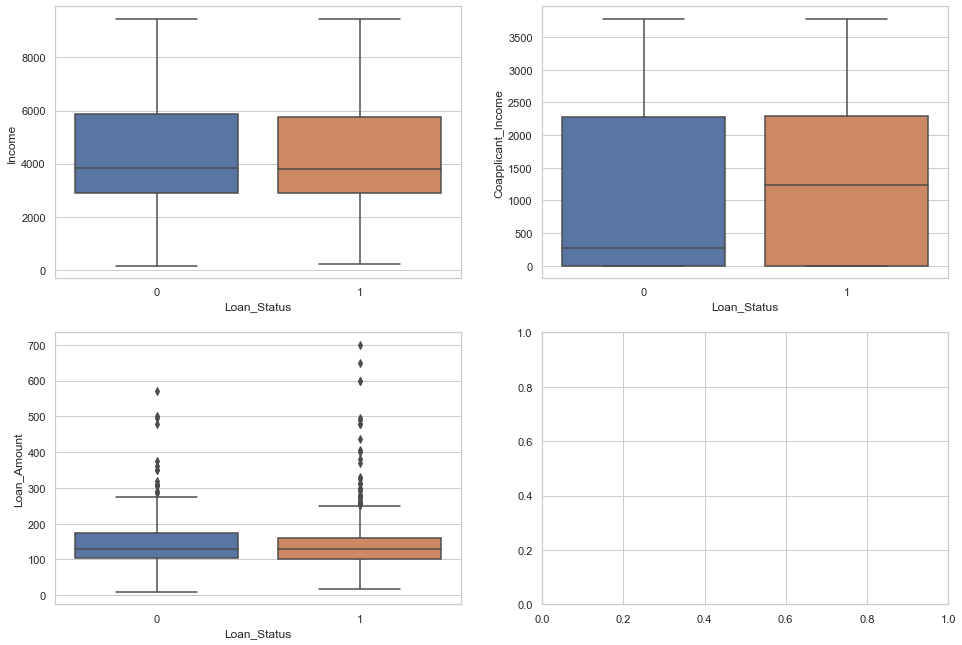

In [48]:
fig,ax=plt.subplots(2,2,figsize=(16,11))
sns.boxplot(x=df['Loan_Status'],y=df['Income'],ax=ax[0][0])
sns.boxplot(x=df['Loan_Status'],y=df['Coapplicant_Income'],ax=ax[0][1])
sns.boxplot(x=df['Loan_Status'],y=df['Loan_Amount'],ax=ax[1][0])

(1)Mean Applicant Income of approved loan(1) and non approved loan(0) are almost the same 

(2)Mean of co-applicant Income of approved loan(1) is more than non approved loan(0).but The possible reason behind this may be that most of the applicants don't have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. So, we can make a new variable in which we will combine the applicant's and co-applicants income to visualize the combined effect of income on loan approval. but also
If co-applicant also have income then chances of getting loan approved increases

(3)Mean loan amount of disapproved loan is higher than approved loan.the odds of approved loans is higher for Low Loan Amount as compared to that of High Loan Amount.

<AxesSubplot:xlabel='Education_Status', ylabel='Loan_Amount'>

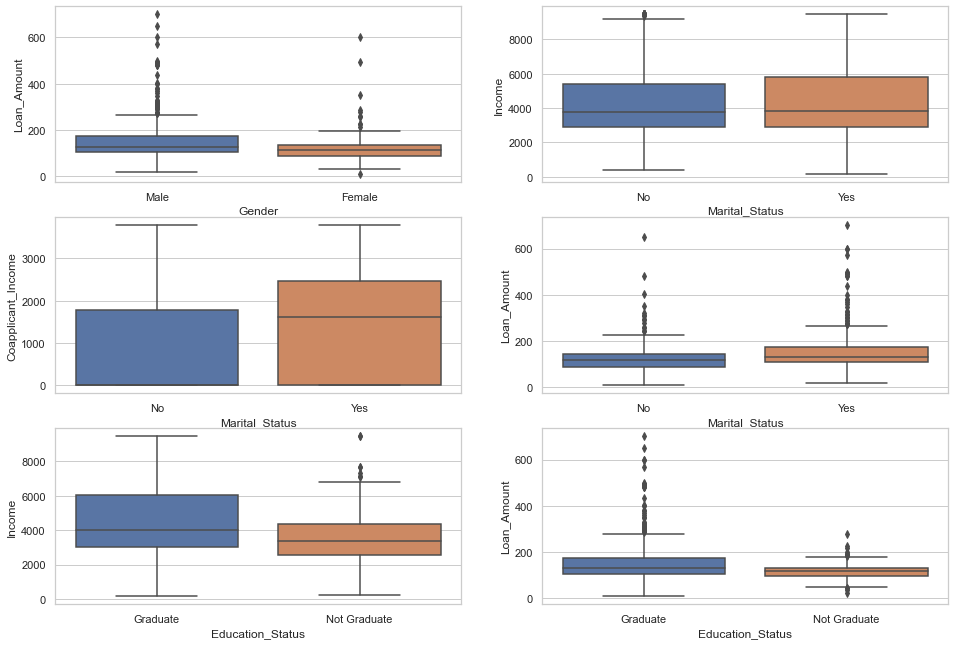

In [49]:
fig,ax=plt.subplots(3,2,figsize=(16,11))
sns.boxplot(x=df['Gender'],y=df['Loan_Amount'],ax=ax[0][0])
sns.boxplot(x=df['Marital_Status'],y=df['Income'],ax=ax[0][1])
sns.boxplot(x=df['Marital_Status'],y=df['Coapplicant_Income'],ax=ax[1][0])
sns.boxplot(x=df['Marital_Status'],y=df['Loan_Amount'],ax=ax[1][1])
sns.boxplot(x=df['Education_Status'],y=df['Income'],ax=ax[2][0])
sns.boxplot(x=df['Education_Status'],y=df['Loan_Amount'],ax=ax[2][1])




#observations

(1)The mean value of Loan Amount applied by males (0) is slightly higher than Females(1).

(2)The mean value of income in married(1) and unmarried(0) is almost same.

(3)If person is married then only they have co-applicant icome

(4)Loan amount requested by married(1) applicants is slightly higher than non-married(0).

(5)There is little different between the mean income of graduate and non-graduates. there are a higher number of graduates with very high incomes, which are outliers in plot.

<AxesSubplot:xlabel='Tenure', ylabel='Loan_Amount'>

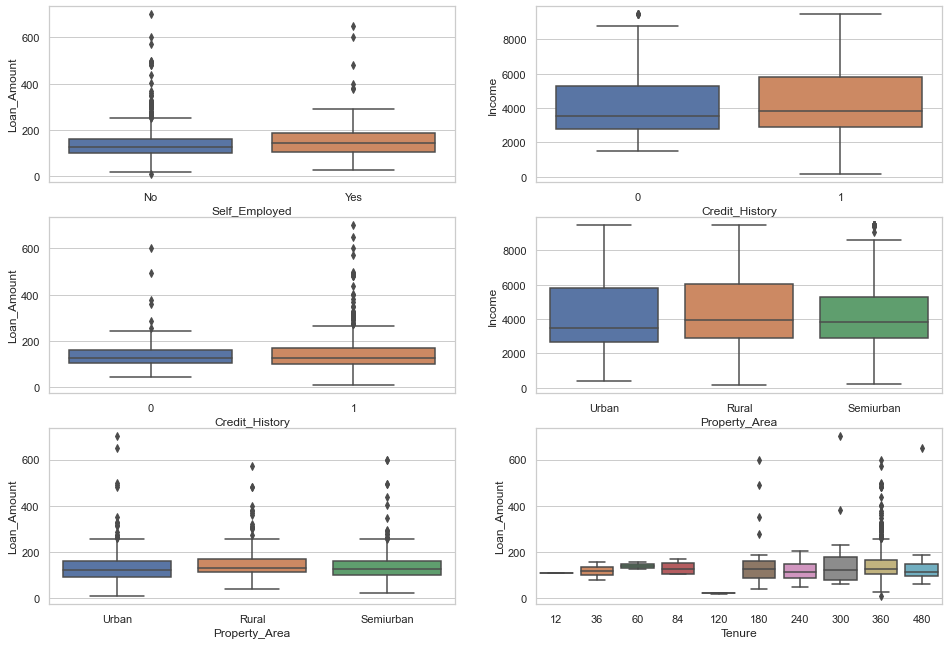

In [50]:
fig,ax=plt.subplots(3,2,figsize=(16,11))
sns.boxplot(x=df['Self_Employed'],y=df['Loan_Amount'],ax=ax[0][0])
sns.boxplot(x=df['Credit_History'],y=df['Income'],ax=ax[0][1])
sns.boxplot(x=df['Credit_History'],y=df['Loan_Amount'],ax=ax[1][0])
sns.boxplot(x=df['Property_Area'],y=df['Income'],ax=ax[1][1])
sns.boxplot(x=df['Property_Area'],y=df['Loan_Amount'],ax=ax[2][0])
sns.boxplot(x=df['Tenure'],y=df['Loan_Amount'],ax=ax[2][1])


#Observations:

Feature engineering

In [51]:
df['Total_income']=df['Income']+df['Coapplicant_Income']

In [52]:
#EMI = P × r × (1 + r)^n/((1 + r)^(n - 1) where P= Loan amount, r= interest rate, n=tenure in number of months
#r per annum=9%=0.09=9/12/100=0.0075 / month ; 1+r=1.0075
df['EMI']=(df['Loan_Amount']*0.0075*(1.0075**df['Tenure']))/(1.0075**(df['Tenure']-1))                        

In [53]:
#balance income
df['Balance_income']=df['Total_income']-(df['EMI']*12)

In [54]:
df.head()

,Gender,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status,Total_income,EMI,Balance_income
0,Male,No,0,Graduate,No,5849.0,0.0,128,360,1,Urban,1,5849.0,0.967200,5837.393600
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128,360,1,Rural,0,6091.0,0.967200,6079.393600
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66,360,1,Urban,1,3000.0,0.498713,2994.015450
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120,360,1,Urban,1,4941.0,0.906750,4930.119000
4,Male,No,0,Graduate,No,6000.0,0.0,141,360,1,Urban,1,6000.0,1.065431,5987.214825


Text(0.5, 1.0, 'Detecting outliers in Income using Boxplot')

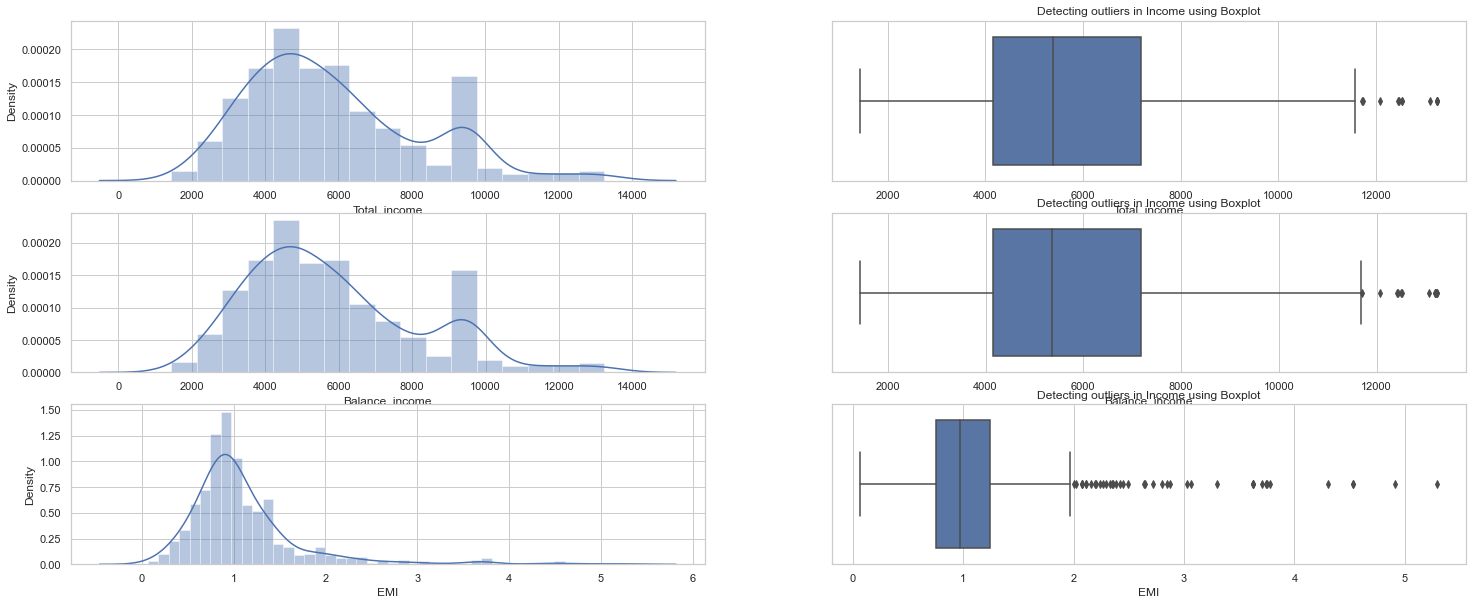

In [55]:
plt.figure(figsize=(25,10))

plt.subplot(3,2,1)
sns.distplot(df['Total_income'])
plt.subplot(3,2,2)
sns.boxplot(df['Total_income'])
plt.title("Detecting outliers in Income using Boxplot")

plt.subplot(3,2,3)
sns.distplot(df['Balance_income'])
plt.subplot(3,2,4)
sns.boxplot(df['Balance_income'])
plt.title("Detecting outliers in Income using Boxplot")

plt.subplot(3,2,5)
sns.distplot(df['EMI'])
plt.subplot(3,2,6)
sns.boxplot(df['EMI'])
plt.title("Detecting outliers in Income using Boxplot")

In [56]:
Total_income_max=max_value(df,'Total_income')
EMI_max=max_value(df,'EMI')
Balance_income_max=max_value(df,'Balance_income')

In [57]:
def outlier_treatment3(Total_income):
    if Total_income>Total_income_max:
        return Total_income_max
    else:
        return Total_income
    
def outlier_treatment4(EMI):
    if EMI>EMI_max:
        return EMI_max
    else:
        return EMI
    
def outlier_treatment5(Balance_income):
    if Balance_income>Balance_income_max:
        return Balance_income_max
    else:
        return Balance_income

In [58]:
df['Total_income']=df['Total_income'].apply(outlier_treatment3)
df['EMI']=df['EMI'].apply(outlier_treatment4)
df['Balance_income']=df['Balance_income'].apply(outlier_treatment5)

Text(0.5, 1.0, 'Detecting outliers in Income using Boxplot')

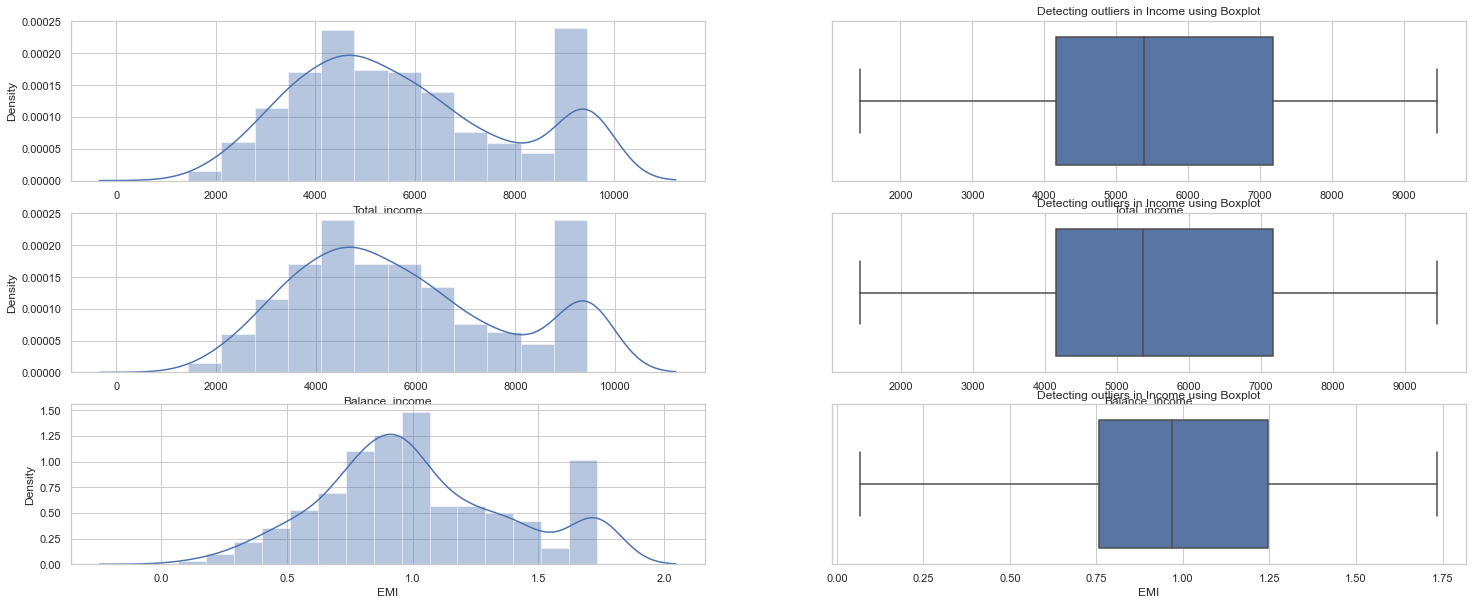

In [59]:
plt.figure(figsize=(25,10))

plt.subplot(3,2,1)
sns.distplot(df['Total_income'])
plt.subplot(3,2,2)
sns.boxplot(df['Total_income'])
plt.title("Detecting outliers in Income using Boxplot")

plt.subplot(3,2,3)
sns.distplot(df['Balance_income'])
plt.subplot(3,2,4)
sns.boxplot(df['Balance_income'])
plt.title("Detecting outliers in Income using Boxplot")

plt.subplot(3,2,5)
sns.distplot(df['EMI'])
plt.subplot(3,2,6)
sns.boxplot(df['EMI'])
plt.title("Detecting outliers in Income using Boxplot")

<AxesSubplot:xlabel='Education_Status', ylabel='Total_income'>

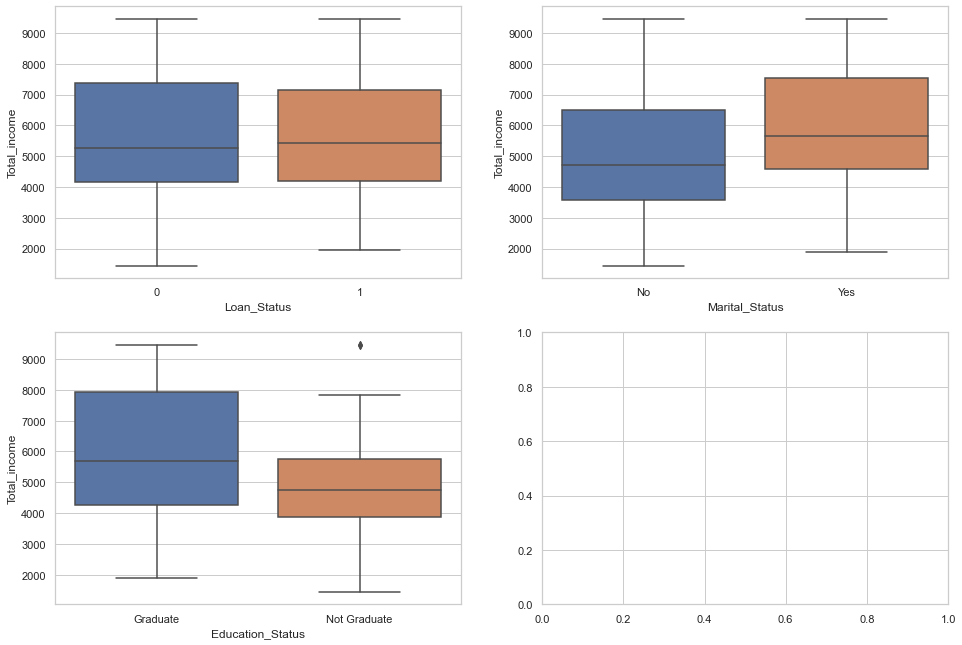

In [60]:
fig,ax=plt.subplots(2,2,figsize=(16,11))
sns.boxplot(x=df['Loan_Status'],y=df['Total_income'],ax=ax[0][0])
sns.boxplot(x=df['Marital_Status'],y=df['Total_income'],ax=ax[0][1])
sns.boxplot(x=df['Education_Status'],y=df['Total_income'],ax=ax[1][0])

observation:

(1)Mean total Income of approved loan(1) and non approved loan(0) are almost the same.

(2)Mean total income of married applicant is higher than non-married applicant

(3Mean total Income of graduates is higher than non graduates.



# Model building

# CLASSIFICATION MODEL

Converting object data type to int for model building

In [61]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df['Marital_Status']=df['Marital_Status'].map({'Yes':1,'No':0})
df['No_Dependents']=df['No_Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
df['Education_Status']=df['Education_Status'].map({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})


Mapped categorical Variables

Gender = male:0 and Female=1

Marital_Status = married:1 and unmarried:0

No_Dependents = 0,1,2,3

Education_Status = Not Graduate:1 and Graduate:0

Self_Employed = self emplyoed:1 and Not self employed:0

Property_Area = Urban:0,Rural:1 and Semiurban:2

Loan_Status = loan status yes:1 and no:2


# Logistic regression

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [63]:
x = df.drop(['Loan_Status','Income','Coapplicant_Income'],axis=1)
y=df['Loan_Status']

In [64]:
# Splitting the dataset into the Training set and Testing set
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=101)

In [65]:
x_train.shape

(429, 12)

In [66]:
y_train.shape

(429,)

In [67]:
# Fitting model to the Training set
log_model1 = LogisticRegression()

log_model1.fit(x_train,y_train)

LogisticRegression()

In [68]:
# Predicting the results
y_pred = log_model1.predict(x_valid)

In [69]:
# Accuracy
accuracy_score(y_valid,y_pred)

0.772972972972973

In [70]:
# Implementing the confusion matrix
confusion_matrix(y_valid,y_pred)

array([[ 25,  39],
       [  3, 118]], dtype=int64)

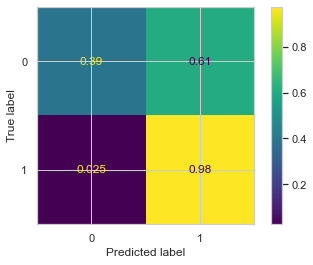

In [71]:
plot_confusion_matrix(log_model1,x_valid,y_valid,normalize='true')

In [72]:
# Classification report
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.39      0.54        64
           1       0.75      0.98      0.85       121

    accuracy                           0.77       185
   macro avg       0.82      0.68      0.70       185
weighted avg       0.80      0.77      0.74       185



In [73]:
from sklearn.metrics import plot_roc_curve

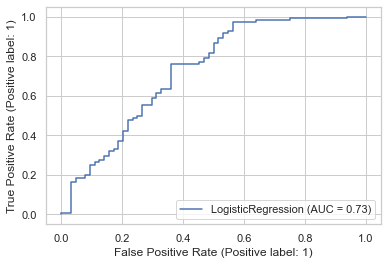

In [74]:
# Plotting ROC curve
plot_roc_curve(log_model1,x_valid,y_valid)

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [76]:
# Applying k-Fold Cross Validation
accuracies=cross_val_score(log_model1,x,y,scoring=make_scorer(accuracy_score),cv=3)
print('Overall Accuracy :',accuracies.mean())
print('Maximum Accuracy :',accuracies.max())
print('Minimum Accuracy :',accuracies.min())


Overall Accuracy : 0.7948110951697753
Maximum Accuracy : 0.8088235294117647
Minimum Accuracy : 0.775609756097561


In [77]:
#Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
skf_log1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
log_scores=cross_val_score(log_model1,x,y,cv=skf_log1)
print('Overall Accuracy :',np.mean(log_scores))
print('Maximum Accuracy :',np.max(log_scores))
print('Minimum Accuracy :',np.min(log_scores))

Overall Accuracy : 0.7996298254891592
Maximum Accuracy : 0.8688524590163934
Minimum Accuracy : 0.7377049180327869


In [78]:
# Feature Scaling
scaler = StandardScaler()
scaled_x=scaler.fit_transform(x)
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_valid = scaler.transform(x_valid)

In [79]:
# Fitting model to the Training set
log_model2 = LogisticRegression()

log_model2.fit(scaled_x_train,y_train)

LogisticRegression()

In [80]:
# Predicting the results
log2_y_pred = log_model2.predict(scaled_x_valid)

In [81]:
# Accuracy
accuracy_score(y_valid,log2_y_pred)

0.7837837837837838

In [82]:
# Implementing the confusion matrix
confusion_matrix(y_valid,log2_y_pred)

array([[ 26,  38],
       [  2, 119]], dtype=int64)

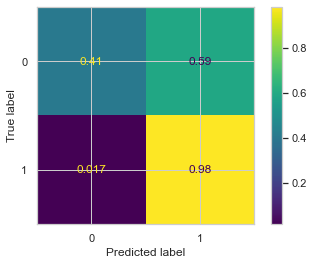

In [83]:
plot_confusion_matrix(log_model2,scaled_x_valid,y_valid,normalize='true')

In [84]:
# Classification report
print(classification_report(y_valid,log2_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.41      0.57        64
           1       0.76      0.98      0.86       121

    accuracy                           0.78       185
   macro avg       0.84      0.69      0.71       185
weighted avg       0.82      0.78      0.76       185



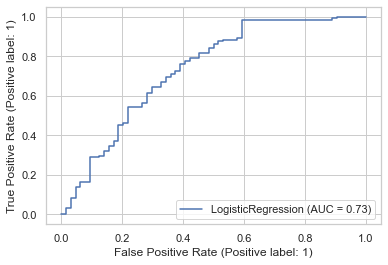

In [85]:
# Plotting ROC curve
plot_roc_curve(log_model2,scaled_x_valid,y_valid)

In [86]:
# Applying k-Fold Cross Validation
accuracies_log2=cross_val_score(log_model2,scaled_x,y,scoring=make_scorer(accuracy_score),cv=3)
print('Overall Accuracy :',accuracies_log2.mean())
print('Maximum Accuracy :',accuracies_log2.max())
print('Minimum Accuracy :',accuracies_log2.min())


Overall Accuracy : 0.8045990754025188
Maximum Accuracy : 0.8284313725490197
Minimum Accuracy : 0.7902439024390244


In [87]:
#Stratified K-Fold Cross Validation
skf_log2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
log_scores2=cross_val_score(log_model2,scaled_x,y,cv=skf_log2)
print('Overall Accuracy :',np.mean(log_scores2))
print('Maximum Accuracy :',np.max(log_scores2))
print('Minimum Accuracy :',np.min(log_scores2))

Overall Accuracy : 0.8110523532522474
Maximum Accuracy : 0.8852459016393442
Minimum Accuracy : 0.7540983606557377


# Decision tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
# Fitting model to the Training set
tree_model1=DecisionTreeClassifier(random_state=101)
tree_model1.fit(x_train,y_train)

DecisionTreeClassifier(random_state=101)

In [90]:
# Predicting the results
tree_model1_pred = tree_model1.predict(x_valid)#y_hat

In [91]:
# Accuracy
accuracy_score(y_valid,tree_model1_pred)

0.6756756756756757

In [92]:
# Implementing the confusion matrix
confusion_matrix(y_valid,tree_model1_pred)

array([[34, 30],
       [30, 91]], dtype=int64)

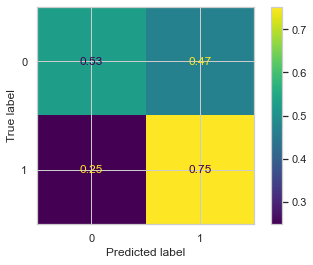

In [93]:
plot_confusion_matrix(tree_model1,x_valid,y_valid,normalize='true')

In [94]:
print(classification_report(y_valid,tree_model1_pred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        64
           1       0.75      0.75      0.75       121

    accuracy                           0.68       185
   macro avg       0.64      0.64      0.64       185
weighted avg       0.68      0.68      0.68       185



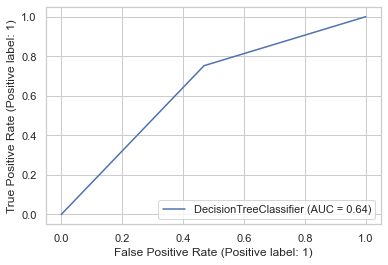

In [95]:
# Plotting ROC curve
plot_roc_curve(tree_model1,x_valid,y_valid)

In [96]:
# Applying k-Fold Cross Validation
accuracies2=cross_val_score(tree_model1,x,y,scoring=make_scorer(accuracy_score),cv=3)
print('Overall Accuracy :',accuracies2.mean())
print('Maximum Accuracy :',accuracies2.max())
print('Minimum Accuracy :',accuracies2.min())

Overall Accuracy : 0.7378287900526064
Maximum Accuracy : 0.7647058823529411
Minimum Accuracy : 0.7170731707317073


In [97]:
#Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
skf_DT = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
DT_scores=cross_val_score(tree_model1,x,y,cv=skf_DT)
print('Overall Accuracy :',np.mean(DT_scores))
print('Maximum Accuracy :',np.max(DT_scores))
print('Minimum Accuracy :',np.min(DT_scores))

Overall Accuracy : 0.7086462189317821
Maximum Accuracy : 0.7868852459016393
Minimum Accuracy : 0.6451612903225806


Visualize the Tree

In [98]:
from sklearn.tree import plot_tree

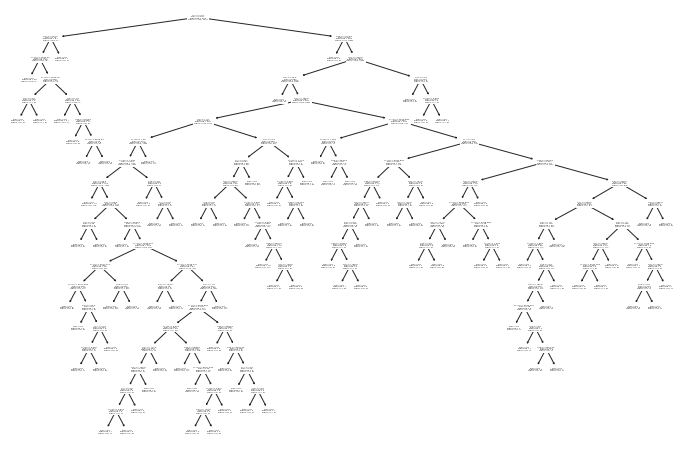

In [99]:
plt.figure(figsize=(12,8))
plot_tree(tree_model1);

# Random Forest Classification

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
# Fitting model to the Training set
forest_model_1 = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
forest_model_1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [102]:
# Predicting the results
forest_model_1_preds = forest_model_1.predict(x_valid)

In [103]:
# Accuracy
accuracy_score(y_valid,forest_model_1_preds)

0.745945945945946

In [104]:
# Implementing the confusion matrix
confusion_matrix(y_valid,forest_model_1_preds)

array([[ 34,  30],
       [ 17, 104]], dtype=int64)

In [105]:
# function for minimizing the error
test_error = []

for n in range(1,25):
    # Use n random trees
    forest_model_2 = RandomForestClassifier(n_estimators=n,random_state=101)#,max_features=4,bootstrap=True,oob_score=True
    forest_model_2.fit(x_train,y_train)
    forest_model_2_preds = forest_model_2.predict(x_valid)
    test_error.append(1-accuracy_score(y_valid,forest_model_2_preds))


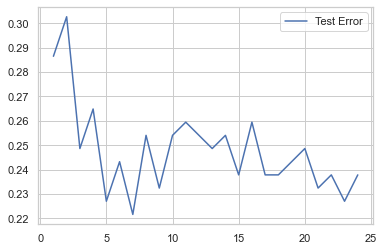

In [106]:
plt.plot(range(1,25),test_error,label='Test Error')
plt.legend()

In [107]:
# Fitting model to the Training set
forest_model_2 = RandomForestClassifier(n_estimators=7,random_state=101)#,max_features=4, bootstrap=True,oob_score=True
forest_model_2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=7, random_state=101)

In [108]:
# Predicting the results
forest_model_2_preds = forest_model_2.predict(x_valid)

In [109]:
# Accuracy
accuracy_score(y_valid,forest_model_2_preds)

0.7783783783783784

In [110]:
# Implementing the confusion matrix
confusion_matrix(y_valid,forest_model_2_preds)

array([[ 34,  30],
       [ 11, 110]], dtype=int64)

In [111]:
# Classification report
print(classification_report(y_valid,forest_model_2_preds))

              precision    recall  f1-score   support

           0       0.76      0.53      0.62        64
           1       0.79      0.91      0.84       121

    accuracy                           0.78       185
   macro avg       0.77      0.72      0.73       185
weighted avg       0.78      0.78      0.77       185



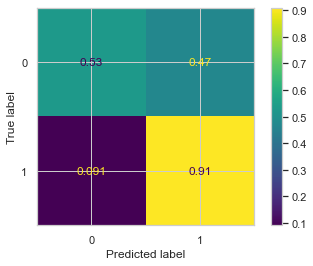

In [112]:
plot_confusion_matrix(forest_model_2,x_valid,y_valid,normalize='true')

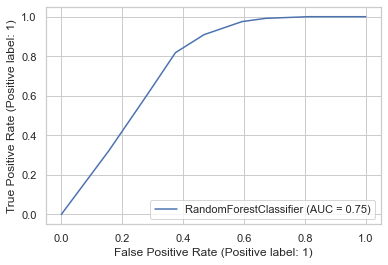

In [113]:
# Plotting ROC curve
plot_roc_curve(forest_model_2,x_valid,y_valid)

In [114]:
# Applying k-Fold Cross Validation
accuracies3=cross_val_score(forest_model_2,x_train,y_train,scoring=make_scorer(accuracy_score),cv=3)
accuracies3.mean()

0.7389277389277389

In [115]:
#Stratified K-Fold Cross Validation
skf_RF2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
RF2_scores=cross_val_score(forest_model_2,x,y,cv=skf_RF2)
print('Overall Accuracy :',np.mean(RF2_scores))
print('Maximum Accuracy :',np.max(RF2_scores))
print('Minimum Accuracy :',np.min(RF2_scores))

Overall Accuracy : 0.7704918032786885
Maximum Accuracy : 0.8225806451612904
Minimum Accuracy : 0.6935483870967742


In [116]:
#importing GRidsearchcv
from sklearn.model_selection import GridSearchCV

In [117]:
#defining grid search parameters
n_estimators=list(range(1,25))
max_features=list(range(1,10))
bootstrap = [True,False]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  

In [118]:
RF_classifier=RandomForestClassifier(random_state=101)
RF_grid=GridSearchCV(RF_classifier,param_grid)

In [119]:
RF_grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24],
                         'oob_score': [True, False]})

In [120]:
RF_grid.best_params_

{'bootstrap': True, 'max_features': 6, 'n_estimators': 23, 'oob_score': True}

In [121]:
#best model according to gridsearch
forest_model_3 = RandomForestClassifier( n_estimators=23,bootstrap=True,max_features= 6, oob_score=True,random_state=101)
forest_model_3.fit(x_train,y_train)
RF3_preds = forest_model_3.predict(x_valid)
print(accuracy_score(RF3_preds,y_valid))

0.772972972972973


In [122]:
# Implementing the confusion matrix
confusion_matrix(y_valid,RF3_preds)

array([[ 31,  33],
       [  9, 112]], dtype=int64)

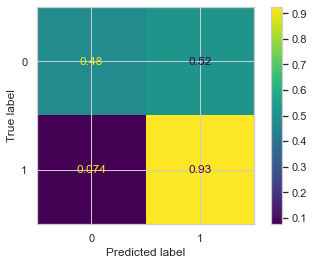

In [123]:
plot_confusion_matrix(forest_model_3,x_valid,y_valid,normalize='true')

In [124]:
print(classification_report(y_valid,RF3_preds))

              precision    recall  f1-score   support

           0       0.78      0.48      0.60        64
           1       0.77      0.93      0.84       121

    accuracy                           0.77       185
   macro avg       0.77      0.70      0.72       185
weighted avg       0.77      0.77      0.76       185



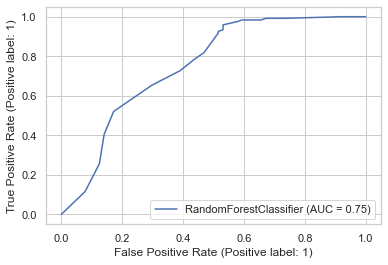

In [125]:
# Plotting ROC curve
plot_roc_curve(forest_model_3,x_valid,y_valid)

In [126]:
# Applying k-Fold Cross Validation
accuracies4=cross_val_score(forest_model_3,x,y,scoring=make_scorer(accuracy_score),cv=3)
print('Overall Accuracy :',accuracies4.mean())
print('Maximum Accuracy :',accuracies4.max())
print('Minimum Accuracy :',accuracies4.min())

Overall Accuracy : 0.7785349912322653
Maximum Accuracy : 0.7990196078431373
Minimum Accuracy : 0.7658536585365854


In [127]:
#Stratified K-Fold Cross Validation
skf_RF3 = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
RF3_scores=cross_val_score(forest_model_3,x,y,cv=skf_RF3)
print('Overall Accuracy :',np.mean(RF3_scores))
print('Maximum Accuracy :',np.max(RF3_scores))
print('Minimum Accuracy :',np.min(RF3_scores))

Overall Accuracy : 0.7833685880486516
Maximum Accuracy : 0.8688524590163934
Minimum Accuracy : 0.7049180327868853


# K-Neighbors Classifier

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [129]:
scaler = StandardScaler()

In [130]:
# Feature Scaling
scaler = StandardScaler()
scaled_x=scaler.fit_transform(x)
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_valid = scaler.transform(x_valid)

In [131]:
knn_model1 = KNeighborsClassifier(n_neighbors=1)

In [132]:
# Fitting model to the Training set
knn_model1.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [133]:
# Fitting model to the Training set
y_pred_knn1 = knn_model1.predict(scaled_x_valid)

In [134]:
# Accuracy
accuracy_score(y_valid,y_pred_knn1)

0.7135135135135136

In [135]:
# Implementing the confusion matrix
confusion_matrix(y_valid,y_pred_knn1)

array([[ 29,  35],
       [ 18, 103]], dtype=int64)

In [136]:
# Classification report
print(classification_report(y_valid,y_pred_knn1))

              precision    recall  f1-score   support

           0       0.62      0.45      0.52        64
           1       0.75      0.85      0.80       121

    accuracy                           0.71       185
   macro avg       0.68      0.65      0.66       185
weighted avg       0.70      0.71      0.70       185



In [137]:
test_error_rates = []


for k in range(1,15):
    knn_model1 = KNeighborsClassifier(n_neighbors=k)
    knn_model1.fit(scaled_x_train,y_train) 
   
    y_pred_knn1 = knn_model1.predict(scaled_x_valid)
    
    test_error = 1 - accuracy_score(y_valid,y_pred_knn1)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

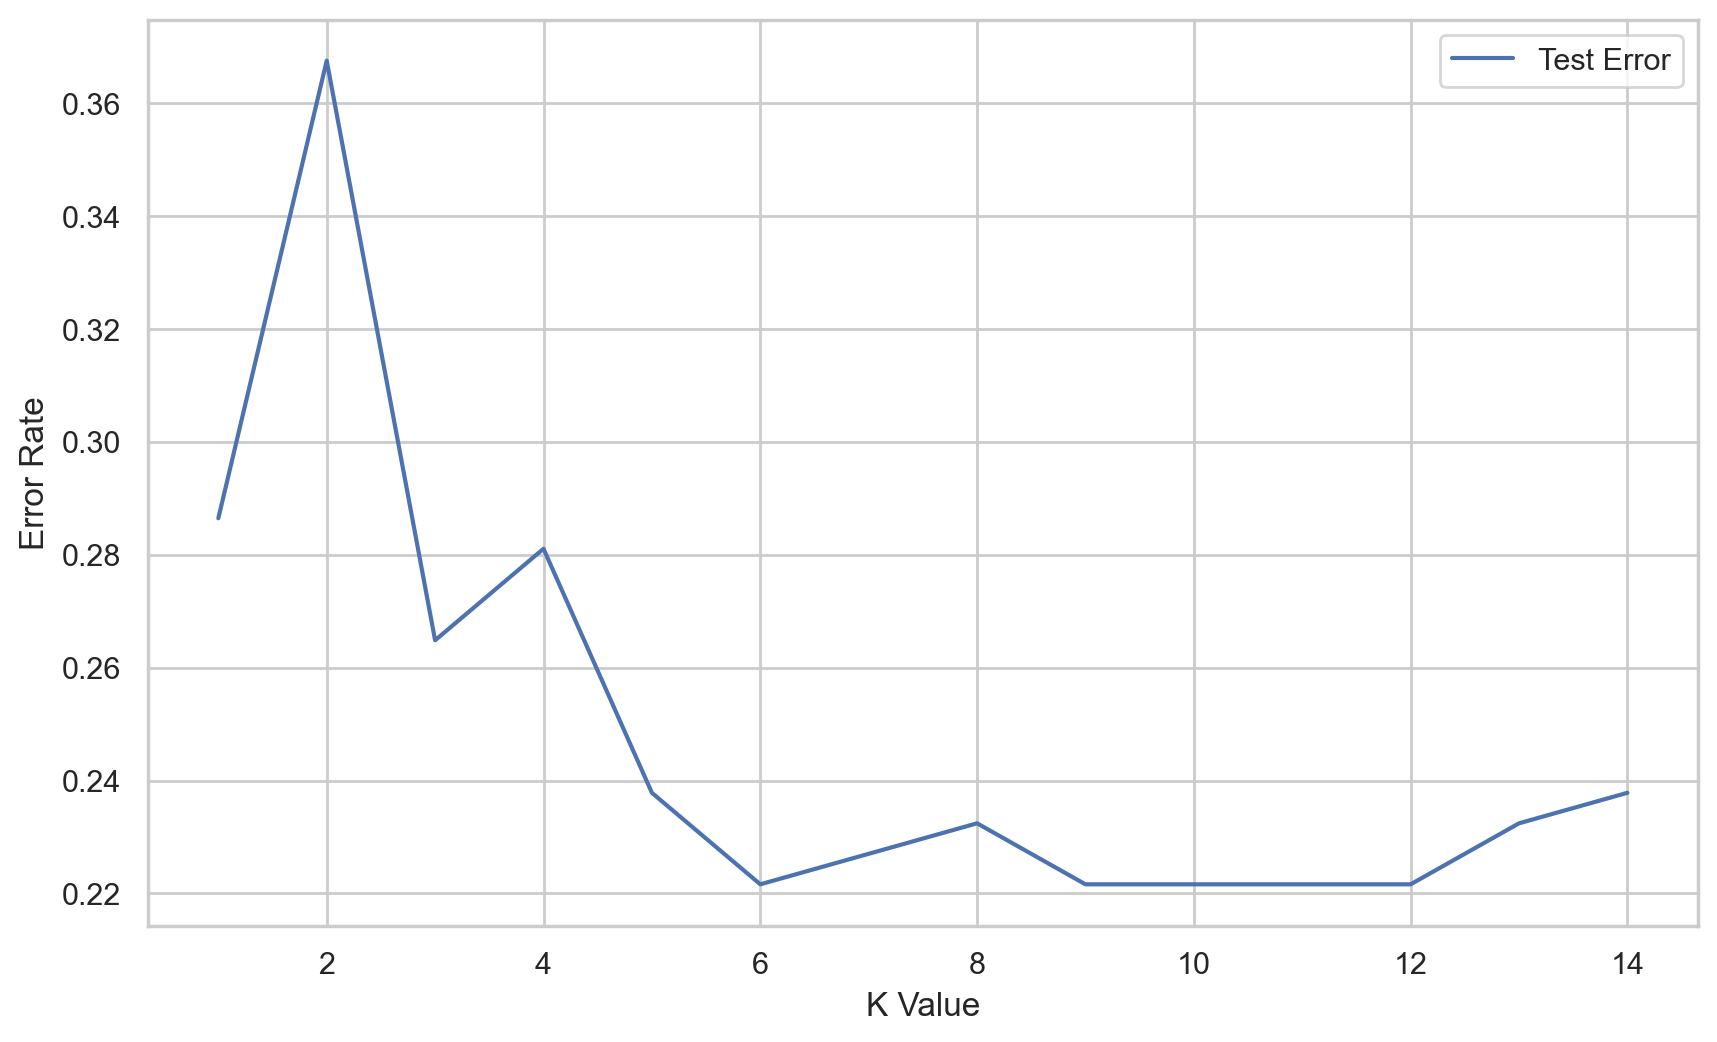

In [138]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,15),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [139]:
knn_model2= KNeighborsClassifier(n_neighbors=9)

In [140]:
knn_model2.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [141]:
y_pred_knn2 = knn_model2.predict(scaled_x_valid)

In [142]:
accuracy_score(y_valid,y_pred_knn2)

0.7783783783783784

In [143]:
# Fitting model to the Training set
knn_model3= KNeighborsClassifier(n_neighbors=6)
knn_model3.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [144]:
# Predicting the results
y_pred_knn3 = knn_model3.predict(scaled_x_valid)

In [145]:
# Accuracy
accuracy_score(y_valid,y_pred_knn3)

0.7783783783783784

In [146]:
# Implementing the confusion matrix
confusion_matrix(y_valid,y_pred_knn3)

array([[ 30,  34],
       [  7, 114]], dtype=int64)

In [147]:
# Classification report
print(classification_report(y_valid,y_pred_knn3))

              precision    recall  f1-score   support

           0       0.81      0.47      0.59        64
           1       0.77      0.94      0.85       121

    accuracy                           0.78       185
   macro avg       0.79      0.71      0.72       185
weighted avg       0.78      0.78      0.76       185



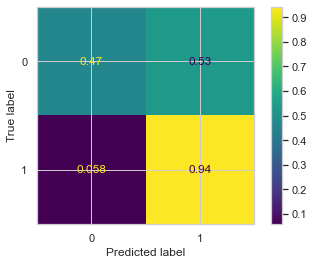

In [148]:
plot_confusion_matrix(knn_model3,scaled_x_valid,y_valid,normalize='true')

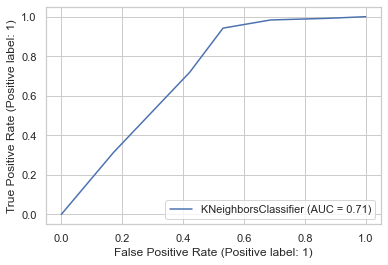

In [149]:
# Plotting ROC curve
plot_roc_curve(knn_model3,scaled_x_valid,y_valid)

In [150]:
# Applying k-Fold Cross Validation
accuracies5=cross_val_score(knn_model3,scaled_x,y,scoring=make_scorer(accuracy_score),cv=3)
print('Overall Accuracy :',accuracies5.mean())
print('Maximum Accuracy :',accuracies5.max())
print('Minimum Accuracy :',accuracies5.min())

Overall Accuracy : 0.7671209947393591
Maximum Accuracy : 0.7794117647058824
Minimum Accuracy : 0.7560975609756098


In [151]:
#Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
skf_knn3 = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
knn3_scores=cross_val_score(knn_model3,scaled_x,y,cv=skf_knn3)
print('Overall Accuracy :',np.mean(knn3_scores))
print('Maximum Accuracy :',np.max(knn3_scores))
print('Minimum Accuracy :',np.min(knn3_scores))

Overall Accuracy : 0.7719460602855632
Maximum Accuracy : 0.8360655737704918
Minimum Accuracy : 0.7049180327868853


# SVM

In [152]:
from sklearn.svm import SVC #support vector classifier

In [153]:
# Feature Scaling
sc = StandardScaler()
scaled_x=sc.fit_transform(x)
scaled_x_train = sc.fit_transform(x_train)
scaled_x_valid = sc.transform(x_valid)

In [154]:
# Fitting model to the Training set
svm_model1 = SVC(kernel = 'linear', random_state = 101)
svm_model1.fit(scaled_x_train, y_train)

SVC(kernel='linear', random_state=101)

In [155]:
# Predecting the results
svm1_y_pred = svm_model1.predict(scaled_x_valid)

In [156]:
# Accuracy
accuracy_score(y_valid,svm1_y_pred)

0.7837837837837838

In [157]:
# Implementing the confusion matrix
confusion_matrix(y_valid, svm1_y_pred)


array([[ 26,  38],
       [  2, 119]], dtype=int64)

In [158]:
# Classification report
print(classification_report(y_valid,svm1_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.41      0.57        64
           1       0.76      0.98      0.86       121

    accuracy                           0.78       185
   macro avg       0.84      0.69      0.71       185
weighted avg       0.82      0.78      0.76       185



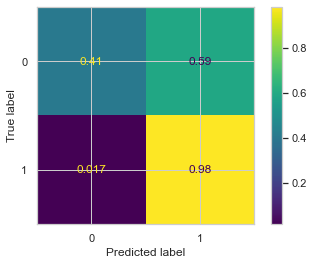

In [159]:
plot_confusion_matrix(svm_model1,scaled_x_valid,y_valid,normalize='true')

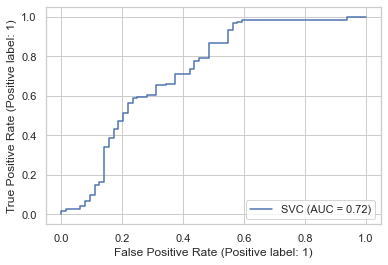

In [160]:
# Plotting ROC curve
plot_roc_curve(svm_model1,scaled_x_valid,y_valid)

In [161]:
# Applying k-Fold Cross Validation
svm1_accuracies = cross_val_score(estimator = svm_model1, X = scaled_x, y = y, cv = 3)
print('Overall Accuracy :',svm1_accuracies.mean())
print('Maximum Accuracy :',svm1_accuracies.max())
print('Minimum Accuracy :',svm1_accuracies.min())

Overall Accuracy : 0.8094850948509485
Maximum Accuracy : 0.8333333333333334
Minimum Accuracy : 0.7951219512195122


In [162]:
#Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
skf_svm1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
svm1_scores=cross_val_score(svm_model1,scaled_x,y,cv=skf_svm1)
print('Overall Accuracy :',np.mean(svm1_scores))
print('Maximum Accuracy :',np.max(svm1_scores))
print('Minimum Accuracy :',np.min(svm1_scores))

Overall Accuracy : 0.809439450026441
Maximum Accuracy : 0.8852459016393442
Minimum Accuracy : 0.7540983606557377


In [163]:
# Fitting model to the Training set
svm_model2 = SVC(kernel = 'rbf', random_state = 101)
svm_model2.fit(scaled_x_train, y_train)

SVC(random_state=101)

In [164]:
# Predecting the results
svm2_y_pred = svm_model2.predict(scaled_x_valid)

In [165]:
# Accuracy
accuracy_score(y_valid,svm2_y_pred)

0.7837837837837838

In [166]:
# Implementing the confusion matrix
confusion_matrix(y_valid, svm2_y_pred)

array([[ 26,  38],
       [  2, 119]], dtype=int64)

In [167]:
# Classification report
print(classification_report(y_valid,svm2_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.41      0.57        64
           1       0.76      0.98      0.86       121

    accuracy                           0.78       185
   macro avg       0.84      0.69      0.71       185
weighted avg       0.82      0.78      0.76       185



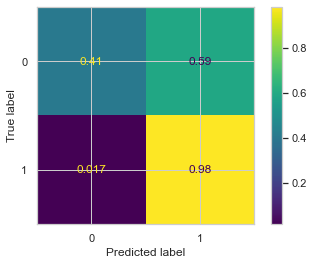

In [168]:
plot_confusion_matrix(svm_model2,scaled_x_valid,y_valid,normalize='true')

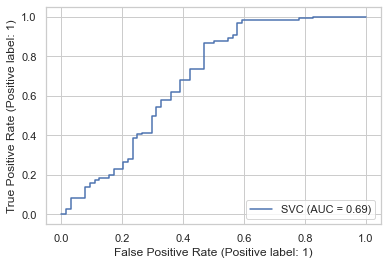

In [169]:
# Plotting ROC curve
plot_roc_curve(svm_model2,scaled_x_valid,y_valid)

In [170]:
# Applying k-Fold Cross Validation
svm2_accuracies = cross_val_score(estimator = svm_model2, X = scaled_x, y = y, cv = 3)
print('Overall Accuracy :',svm2_accuracies.mean())
print('Maximum Accuracy :',svm2_accuracies.max())
print('Minimum Accuracy :',svm2_accuracies.min())

Overall Accuracy : 0.807851107922844
Maximum Accuracy : 0.8284313725490197
Minimum Accuracy : 0.7951219512195122


In [171]:
#Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
skf_svm2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
svm2_scores=cross_val_score(svm_model2,scaled_x,y,cv=skf_svm2)
print('Overall Accuracy :',np.mean(svm2_scores))
print('Maximum Accuracy :',np.max(svm2_scores))
print('Minimum Accuracy :',np.min(svm2_scores))

Overall Accuracy : 0.8078265468006347
Maximum Accuracy : 0.8852459016393442
Minimum Accuracy : 0.7540983606557377


# Model Selection 

Model selection refers to the proces of choosing the model that best generalizes.

-For our model Criterias for model selection are Complexity of model,Accuracy,Hyper parameters.

-Selected model: kNN | Model name: knn_model3

# Testing data given by customers

In [172]:
import os
os.getcwd()


'C:\\Users\\Admin'

In [173]:
pwd

'C:\\Users\\Admin'

In [174]:
test=pd.read_csv('test.csv')

In [175]:
test.head()

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [176]:
test.shape

(367, 12)

In [177]:
test.size

4404

In [178]:
test.columns

Index(['Loan_ID', 'Sex', 'Marital_Status', 'No_Dependents', 'Education_Status',
       'Self_Employed', 'Income', 'Coapplicant_Income', 'Loan_Amount',
       'Tenure', 'Credit_History', 'Property_Area'],
      dtype='object')

In [179]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             367 non-null    object 
 1   Sex                 356 non-null    object 
 2   Marital_Status      367 non-null    object 
 3   No_Dependents       357 non-null    object 
 4   Education_Status    367 non-null    object 
 5   Self_Employed       344 non-null    object 
 6   Income              367 non-null    int64  
 7   Coapplicant_Income  367 non-null    int64  
 8   Loan_Amount         362 non-null    float64
 9   Tenure              361 non-null    float64
 10  Credit_History      338 non-null    float64
 11  Property_Area       367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [180]:
test.describe()

,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# Testing Data Preprocessing

In [181]:
#dropping loan ID
test.drop('Loan_ID',axis=1,inplace=True)

In [182]:
test.rename({'Sex':'Gender'},axis=1,inplace=True)

In [183]:
test.head()

,Gender,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Treating missing values

In [184]:
#Identifying missing values
test.isnull().sum()

Gender                11
Marital_Status         0
No_Dependents         10
Education_Status       0
Self_Employed         23
Income                 0
Coapplicant_Income     0
Loan_Amount            5
Tenure                 6
Credit_History        29
Property_Area          0
dtype: int64

<AxesSubplot:>

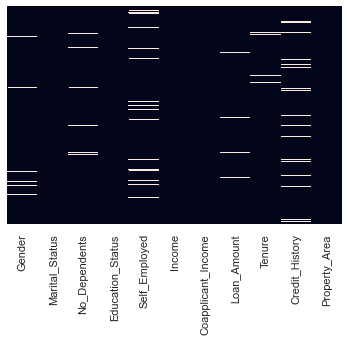

In [185]:
#Identifying missing values with visualisation
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [186]:
#Filling the missing data with the mode value for a categorical variable.
test['Gender'].fillna(test.Gender.mode()[0],inplace=True)
test['Marital_Status'].fillna(test.Marital_Status.mode()[0],inplace=True)
test['No_Dependents'].fillna(test.No_Dependents.mode()[0],inplace=True)
test['Self_Employed'].fillna(test.Self_Employed.mode()[0],inplace=True)
test['Credit_History'].fillna(test.Credit_History.mode()[0],inplace=True)
test['Tenure'].fillna(test['Tenure'].mode()[0],inplace=True)
#Filling the missing data with the mean value for a numerical variable.
test['Loan_Amount'].fillna(test['Loan_Amount'].median(),inplace=True)


<AxesSubplot:>

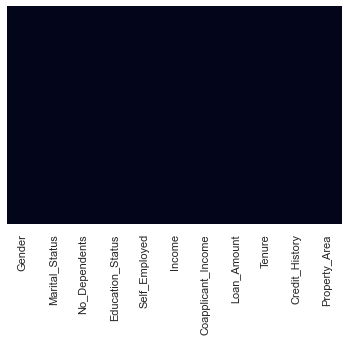

In [187]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [188]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              367 non-null    object 
 1   Marital_Status      367 non-null    object 
 2   No_Dependents       367 non-null    object 
 3   Education_Status    367 non-null    object 
 4   Self_Employed       367 non-null    object 
 5   Income              367 non-null    int64  
 6   Coapplicant_Income  367 non-null    int64  
 7   Loan_Amount         367 non-null    float64
 8   Tenure              367 non-null    float64
 9   Credit_History      367 non-null    float64
 10  Property_Area       367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [189]:
test['Credit_History']=test['Credit_History'].astype(int)

# Detecting Outliers

In [190]:
test[['Income','Coapplicant_Income','Loan_Amount']].describe()

,Income,Coapplicant_Income,Loan_Amount
count,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926
std,4910.685399,2334.232099,60.959739
min,0.000000,0.000000,28.000000
25%,2864.000000,0.000000,101.000000
50%,3786.000000,1025.000000,125.000000
75%,5060.000000,2430.500000,157.500000
max,72529.000000,24000.000000,550.000000


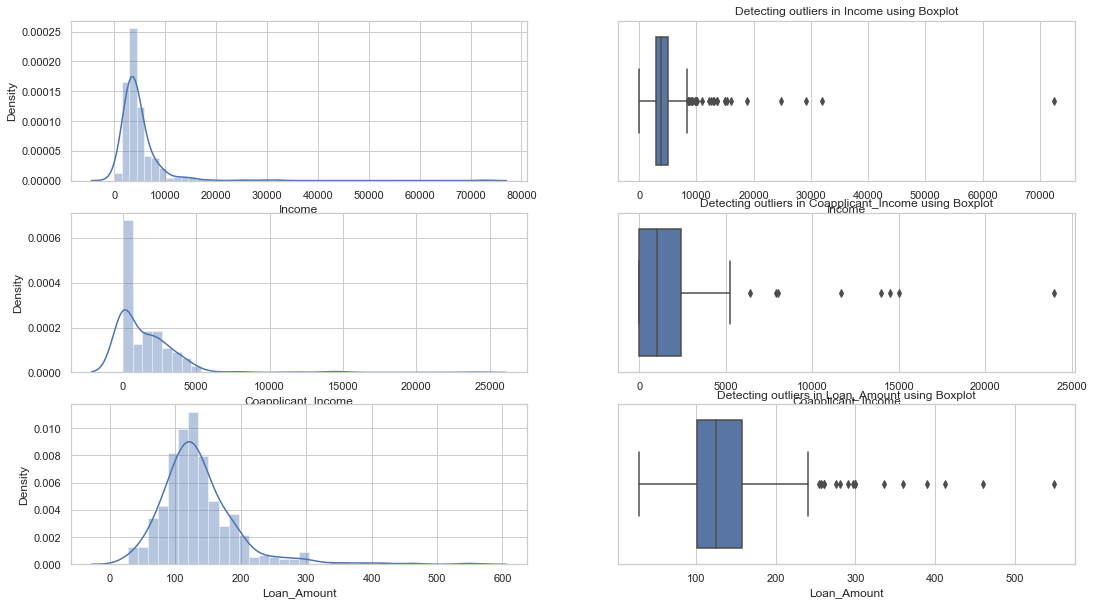

In [191]:
plt.figure(figsize=(18,10))

plt.subplot(3,2,1)
sns.distplot(test['Income'])
plt.subplot(3,2,2)
sns.boxplot(test['Income'])
plt.title("Detecting outliers in Income using Boxplot")

plt.subplot(3,2,3)
sns.distplot(test['Coapplicant_Income'])
plt.subplot(3,2,4)
sns.boxplot(test['Coapplicant_Income'])
plt.title("Detecting outliers in Coapplicant_Income using Boxplot")


plt.subplot(3,2,5)
sns.distplot(test['Loan_Amount'])
plt.subplot(3,2,6)
sns.boxplot(test['Loan_Amount'])
plt.title("Detecting outliers in Loan_Amount using Boxplot")



plt.show()


Observations

(1)Distribution of applicant income is right skewed and it has lots of outliers.This can be due to the high income differences in the society.

(2)Similar distribution with coapplicant income

(3)loan amount distribution is fairly normal and still has lot of outliers but outliers in loan amount is possible because loan amount can vary depending upon requirement of applicant. as there can be different reasons why high amount loans were approved we will not treat outliers here


In [192]:
#getting max value with predefined max_value function
test_income_max=max_value(test,'Income')
test_co_income_max=max_value(test,'Coapplicant_Income')
print(test_income_max)
print(test_co_income_max)

7882.400000000001
3782.6000000000013


In [193]:
def outlier_treatment6(Income):
    if Income>test_income_max:
        return test_income_max
    else:
        return Income

In [194]:
def outlier_treatment7(Coapplicant_Income):
    if Coapplicant_Income>test_co_income_max:
        return test_co_income_max
    else:
        return Coapplicant_Income

In [195]:
test['Income']=test['Income'].apply(outlier_treatment6)
test['Coapplicant_Income']=test['Coapplicant_Income'].apply(outlier_treatment7)

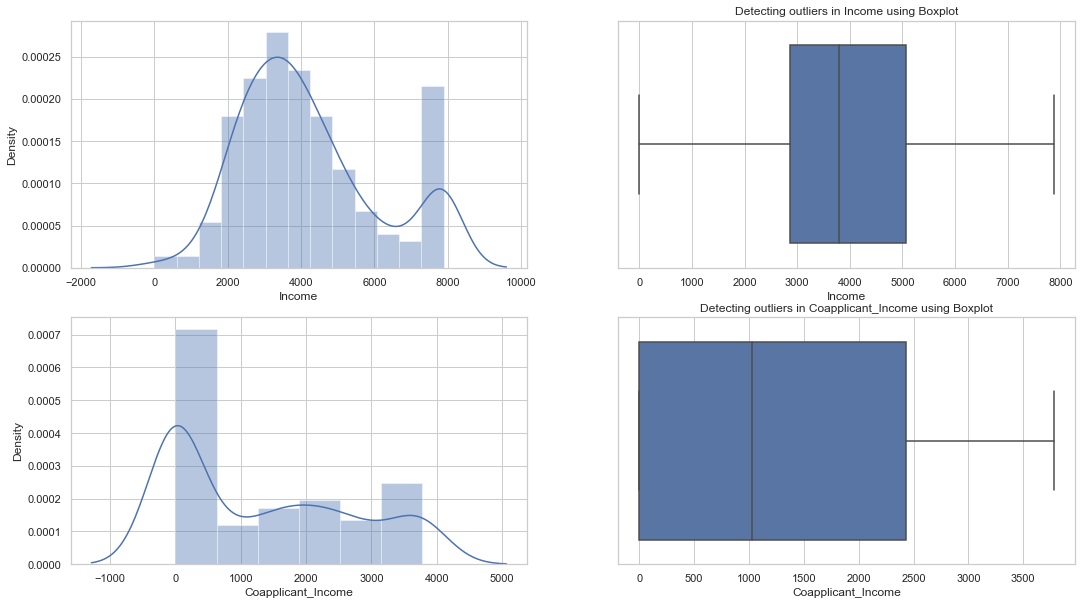

In [196]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.distplot(test['Income'])
plt.subplot(2,2,2)
sns.boxplot(test['Income'])
plt.title("Detecting outliers in Income using Boxplot")

plt.subplot(2,2,3)
sns.distplot(test['Coapplicant_Income'])
plt.subplot(2,2,4)
sns.boxplot(test['Coapplicant_Income'])
plt.title("Detecting outliers in Coapplicant_Income using Boxplot")

plt.show()

Feature engineering

In [197]:
test['Total_income']=test['Income']+test['Coapplicant_Income']

In [198]:
test['EMI']=(test['Loan_Amount']*0.0075*(1.0075**test['Tenure']))/(1.0075**(test['Tenure']-1))

In [199]:
test['Balance_income']=test['Total_income']-(test['EMI']*12)

In [200]:
test.head()

,Gender,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area,Total_income,EMI,Balance_income
0,Male,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1,Urban,5720.0,0.831187,5710.02575
1,Male,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1,Urban,4576.0,0.952088,4564.57495
2,Male,Yes,2,Graduate,No,5000.0,1800.0,208.0,360.0,1,Urban,6800.0,1.571700,6781.13960
3,Male,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,1,Urban,4886.0,0.755625,4876.93250
4,Male,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1,Urban,3276.0,0.589388,3268.92735


Text(0.5, 1.0, 'Detecting outliers in Income using Boxplot')

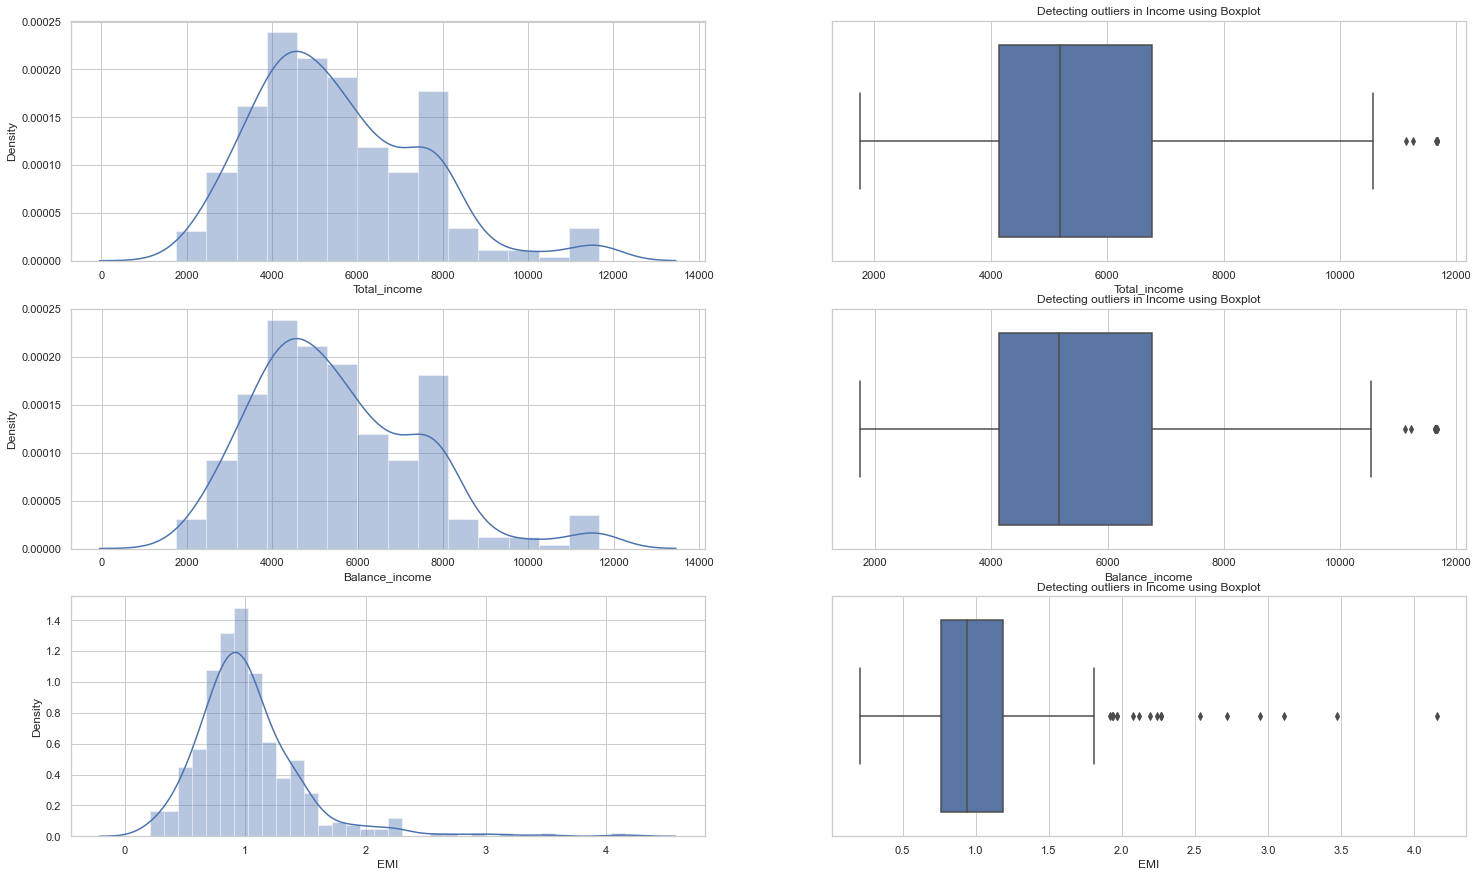

In [201]:
plt.figure(figsize=(25,15))

plt.subplot(3,2,1)
sns.distplot(test['Total_income'])
plt.subplot(3,2,2)
sns.boxplot(test['Total_income'])
plt.title("Detecting outliers in Income using Boxplot")


plt.subplot(3,2,3)
sns.distplot(test['Balance_income'])
plt.subplot(3,2,4)
sns.boxplot(test['Balance_income'])
plt.title("Detecting outliers in Income using Boxplot")

plt.subplot(3,2,5)
sns.distplot(test['EMI'])
plt.subplot(3,2,6)
sns.boxplot(test['EMI'])
plt.title("Detecting outliers in Income using Boxplot")

In [202]:
Total_income_max=max_value(test,'Total_income')
EMI_max=max_value(test,'EMI')
Balance_income_max=max_value(test,'Balance_income')

In [203]:
def outlier_treatment8(Total_income):
    if Total_income>Total_income_max:
        return Total_income_max
    else:
        return Total_income
    
def outlier_treatment9(EMI):
    if EMI>EMI_max:
        return EMI_max
    else:
        return EMI
    
def outlier_treatment10(Balance_income):
    if Balance_income>Balance_income_max:
        return Balance_income_max
    else:
        return Balance_income

In [204]:
test['Total_income']=test['Total_income'].apply(outlier_treatment8)
test['EMI']=test['EMI'].apply(outlier_treatment9)
test['Balance_income']=test['Balance_income'].apply(outlier_treatment10)

Text(0.5, 1.0, 'Detecting outliers in Income using Boxplot')

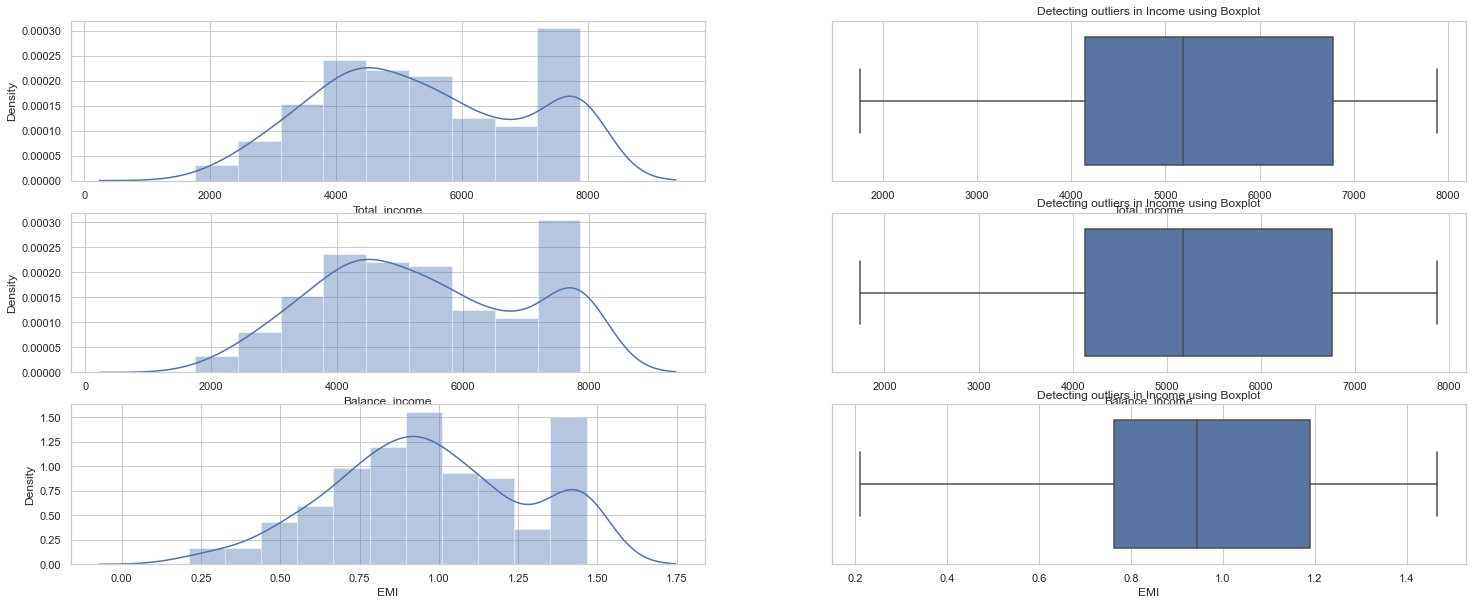

In [205]:
plt.figure(figsize=(25,10))

plt.subplot(3,2,1)
sns.distplot(test['Total_income'])
plt.subplot(3,2,2)
sns.boxplot(test['Total_income'])
plt.title("Detecting outliers in Income using Boxplot")


plt.subplot(3,2,3)
sns.distplot(test['Balance_income'])
plt.subplot(3,2,4)
sns.boxplot(test['Balance_income'])
plt.title("Detecting outliers in Income using Boxplot")

plt.subplot(3,2,5)
sns.distplot(test['EMI'])
plt.subplot(3,2,6)
sns.boxplot(test['EMI'])
plt.title("Detecting outliers in Income using Boxplot")

Converting object data type to int for model

In [206]:
test['Gender']=test['Gender'].map({'Male':0,'Female':1})
test['Marital_Status']=test['Marital_Status'].map({'Yes':1,'No':0})
test['No_Dependents']=test['No_Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
test['Education_Status']=test['Education_Status'].map({'Graduate':1,'Not Graduate':0})
test['Self_Employed']=test['Self_Employed'].map({'Yes':1,'No':0})
test['Property_Area']=test['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})

In [207]:
test.head()

,Gender,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area,Total_income,EMI,Balance_income
0,0,1,0,1,0,5720.0,0.0,110.0,360.0,1,0,5720.0,0.831187,5710.02575
1,0,1,1,1,0,3076.0,1500.0,126.0,360.0,1,0,4576.0,0.952088,4564.57495
2,0,1,2,1,0,5000.0,1800.0,208.0,360.0,1,0,6800.0,1.465913,6781.13960
3,0,1,2,1,0,2340.0,2546.0,100.0,360.0,1,0,4886.0,0.755625,4876.93250
4,0,0,0,0,0,3276.0,0.0,78.0,360.0,1,0,3276.0,0.589388,3268.92735


# Predicting target for testing data set

In [208]:
test_data=test.drop(['Income','Coapplicant_Income'],axis=1)

In [209]:
# Feature Scaling
scaler = StandardScaler()
scaled_test_data=scaler.fit_transform(test_data)

# knn model

In [210]:
knn_test_predictions=knn_model3.predict(scaled_test_data)
print('predicted target variable for test data',knn_test_predictions)

predicted target variable for test data [1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1
 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [211]:
dataframe2=pd.DataFrame({'loan_status':knn_test_predictions})

In [212]:
data_excel2=pd.ExcelWriter('knnPredicted loan status.xlsx',engine='xlsxwriter')

In [213]:
dataframe2.to_excel(data_excel2,sheet_name='sheet1')

In [214]:
data_excel2.save()